### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [135]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols


In [136]:
# Load the CSV file(s).
turtle_reviews = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
turtle_reviews.head()


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [137]:
# Check for missing values.
turtle_reviews.isna().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [138]:
# Explore the data.
print(turtle_reviews.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [139]:
# Sense-check the DataFrame.
print(turtle_reviews.shape)
print(turtle_reviews.dtypes)


(2000, 11)
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [140]:
a


age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [141]:
# Drop unnecessary columns.
turtle_reviews = turtle_reviews.drop(columns=["language", "platform"])

# View column names.
print(turtle_reviews.columns)


Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [142]:
# Rename the column headers.
turtle_reviews = turtle_reviews.rename(columns={"remuneration (k£)": "remuneration",
                                                "spending_score (1-100)": "spending_score"})

# View column names.
print(turtle_reviews.columns)


Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [143]:
# Create a CSV file as output.
turtle_reviews.to_csv("reviews_clean.csv", index=False)


In [144]:
# Import new CSV file with Pandas.
reviews = pd.read_csv("reviews_clean.csv")

# View DataFrame.
reviews.head()


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

In [145]:
# Define independent variable.
x = reviews["spending_score"]

# Define dependent variable.
y = reviews["loyalty_points"]

# Create model.
f = "y ~ x"
test = ols(f, data=reviews).fit()

# Print summary of metrics.
test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.92e-263
Time:                        11:54:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [147]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.0527) + 33.0617 * reviews["spending_score"]

# View the output.
y_pred


0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

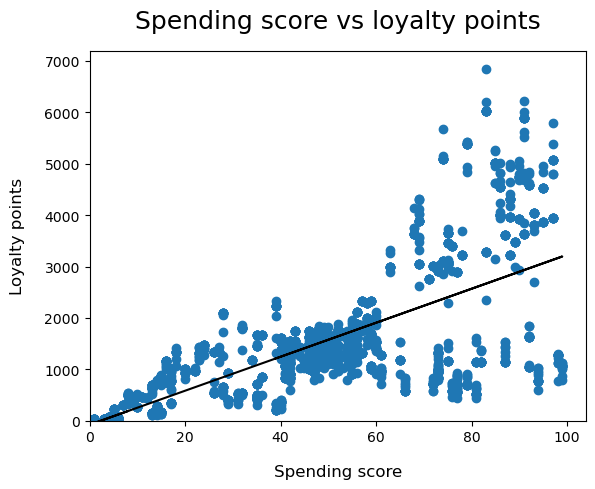

In [148]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color="black")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Spending score vs loyalty points", fontsize=18, y=1.04)
plt.xlabel("Spending score", fontsize=12, labelpad=14)
plt.ylabel("Loyalty points", fontsize=12, labelpad=14)

# View the plot.
plt.show()


### 5b) remuneration vs loyalty

In [149]:
# Define independent variable.
x = reviews["remuneration"]

# Define dependent variable.
y = reviews["loyalty_points"]

# Create model.
f = "y ~ x"
test = ols(f, data=reviews).fit()

# Print summary of metrics.
test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.43e-209
Time:                        11:55:05   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [151]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * reviews["remuneration"]

# View the output.
y_pred


0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

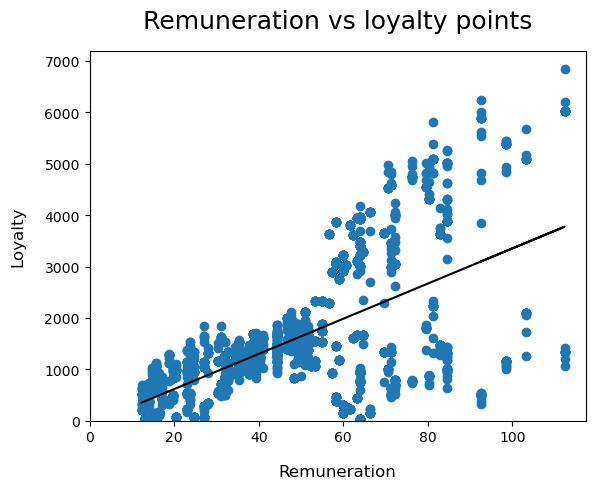

In [152]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color="black")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Remuneration vs loyalty points", fontsize=18, y=1.04)
plt.xlabel("Remuneration", fontsize=12, labelpad=14)
plt.ylabel("Loyalty", fontsize=12, labelpad=14)

# View the plot.
plt.show()


### 5c) age vs loyalty

In [153]:
# Define independent variable.
x = reviews["age"]

# Define dependent variable.
y = reviews["loyalty_points"]

# Create model.
f = "y ~ x"
test = ols(f, data=reviews).fit()

# Print summary of metrics.
test.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 02 May 2024   Prob (F-statistic):             0.0577
Time:                        11:55:09   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [155]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + (-4.0128) * reviews["age"]

# View the output.
y_pred


0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

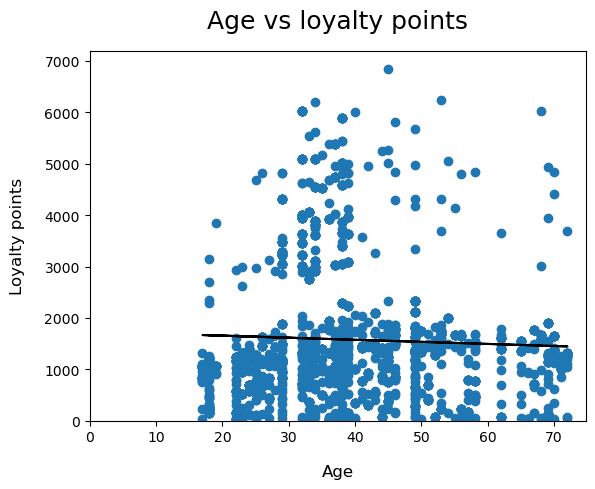

In [156]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color="black")

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Age vs loyalty points", fontsize=18, y=1.04)
plt.xlabel("Age", fontsize=12, labelpad=14)
plt.ylabel("Loyalty points", fontsize=12, labelpad=14)

# View the plot.
plt.show()


## 6. Observations and insights

#### Spending score vs loyalty points

* The R-squared tells us that 45.2% of variation in loyalty points can be explained by spending score.
* The coefficient value of 33.0617 tells us that as the spending score variable increases by 1, the predicted value of loyalty points increases by 33.0617.

#### Remuneration vs loyalty points

* The R-squared tells us that 38% of variation in loyalty points can be explained by remuneration.
* The coefficient value of 34.1878 tells us that as the remuneration variable increases by 1, the predicted value of loyalty points increases by 34.1878.

#### Age vs loyalty points

* The R-squared tells us that 0.2% of variation in loyalty points can be explained by age.
* The coefficient value of -4.0128 tells us that as the age variable increases by 1, the predicted value of loyalty points decreases by -4.0128.


#

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [157]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import math
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")

# plt.rcParams["figure.figsize"] = [15, 10]


In [158]:
# Create your new DataFrame.
reviews1 = pd.read_csv("reviews_clean.csv")

# View DataFrame.
reviews1.head()


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

#### Note

I have decided to include the categorical variables "gender" and "education" in the analysis to further explore how customers engage with and accumulate loyalty points. 

In [159]:
# Create new DataFrame and convert categorical variables to dummy variables.
cat_vars = ["gender", "education"]

# Use the for loop keyword to specify what actions to apply to all the 'var' items.
for var in cat_vars:
    # Specify details of the categorical list.
    cat_list = pd.get_dummies(reviews1[var], prefix=var)
    # Specify data type as int.
    cat_list = cat_list.astype(int)
    # Indicate the joining of the DataFrames.
    reviews1 = reviews1.join(cat_list)

reviews_fin = reviews1.drop(cat_vars, axis=1) 

# Set a temporary DataFrame and add values.
reviews_vars = reviews_fin.columns.values.tolist()  

# Indicate what columns are kept.
to_keep = [i for i in reviews_vars if i not in cat_vars] 

# Define new DataFrame.
reviews_fin = reviews1[to_keep]  

# Print the column.
reviews_fin.columns.values


array(['age', 'remuneration', 'spending_score', 'loyalty_points',
       'product', 'review', 'summary', 'gender_Female', 'gender_Male',
       'education_Basic', 'education_PhD', 'education_diploma',
       'education_graduate', 'education_postgraduate'], dtype=object)

In [160]:
# View the DataFrame.
reviews_fin.head()


age  remuneration  spending_score  loyalty_points  product  \
0   18         12.30              39             210      453   
1   23         12.30              81             524      466   
2   22         13.12               6              40      254   
3   25         13.12              77             562      263   
4   33         13.94              40             366      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_Female  \
0  The fact that 50% of this space is wasted on a...              0   
1  Another worthless Dungeon Master's screen from...              0   
2                    pretty, but also pretty useless              1   
3                                         Five Stars              1   
4                                         Money trap              1   

   gender_Male  education_Basic  education_PhD  education_diploma  \
0            1                0              0                  0   
1            1                0              0                  0   
2            0                0              0                  0   
3            0                0              0                  0   
4            0                0              0                  0   

   education_graduate  education_postgraduate  
0                   1                       0  
1                   1                       0  
2                   1                       0  
3                   1                       0  
4                   1                       0

In [161]:
# Specify y.
y = reviews_fin["loyalty_points"]

# Specify X.
X = reviews_fin[["age", "remuneration", "spending_score", "gender_Female",
                 "gender_Male", "education_Basic", "education_PhD",
                 "education_diploma", "education_graduate", "education_postgraduate"]]


In [162]:
# Review y.
y


0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

In [163]:
# Review X.
X


age  remuneration  spending_score  gender_Female  gender_Male  \
0      18         12.30              39              0            1   
1      23         12.30              81              0            1   
2      22         13.12               6              1            0   
3      25         13.12              77              1            0   
4      33         13.94              40              1            0   
...   ...           ...             ...            ...          ...   
1995   37         84.46              69              1            0   
1996   43         92.66               8              1            0   
1997   34         92.66              91              0            1   
1998   34         98.40              16              0            1   
1999   32         92.66               8              0            1   

      education_Basic  education_PhD  education_diploma  education_graduate  \
0                   0              0                  0                   1   
1                   0              0                  0                   1   
2                   0              0                  0                   1   
3                   0              0                  0                   1   
4                   0              0                  0                   1   
...               ...            ...                ...                 ...   
1995                0              1                  0                   0   
1996                0              1                  0                   0   
1997                0              0                  0                   1   
1998                0              1                  0                   0   
1999                0              1                  0                   0   

      education_postgraduate  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
1995                       0  
1996                       0  
1997                       0  
1998                       0  
1999                       0  

[2000 rows x 10 columns]

## 2. Create train and test data sets.

In [164]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)


## 3. Create Decision tree regressor

In [165]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [166]:
# Evaluate the model.
# Predict on training data.
y_train_pred = regressor.predict(X_train)

# Predict on testing data.
y_test_pred = regressor.predict(X_test)

# Calculate R-squared for training data.
r_squared_train = r2_score(y_train, y_train_pred)

# Calculate R-squared for testing data.
r_squared_test = r2_score(y_test, y_test_pred)

# Print R-squared values.
print("R-squared for training data:", r_squared_train)
print("R-squared for testing data:", r_squared_test)


R-squared for training data: 1.0
R-squared for testing data: 0.9953086599244081


In [167]:
# Predict the response for the data test.
y_predict = regressor.predict(X_test)  

# Print the MAE and MSE to evaluate the model.
print("Mean Absolute Error = {:2.2f}".format(metrics.mean_absolute_error(y_test, y_predict)))
print("Mean Squared Error = {:2.2f}".format(metrics.mean_squared_error(y_test, y_predict)))

# Calculate the RMSE.
print("Root Mean Squared Error = {:2.2f}".format(math.sqrt(metrics.mean_squared_error(y_test, y_predict))))


Mean Absolute Error = 31.95
Mean Squared Error = 7599.02
Root Mean Squared Error = 87.17


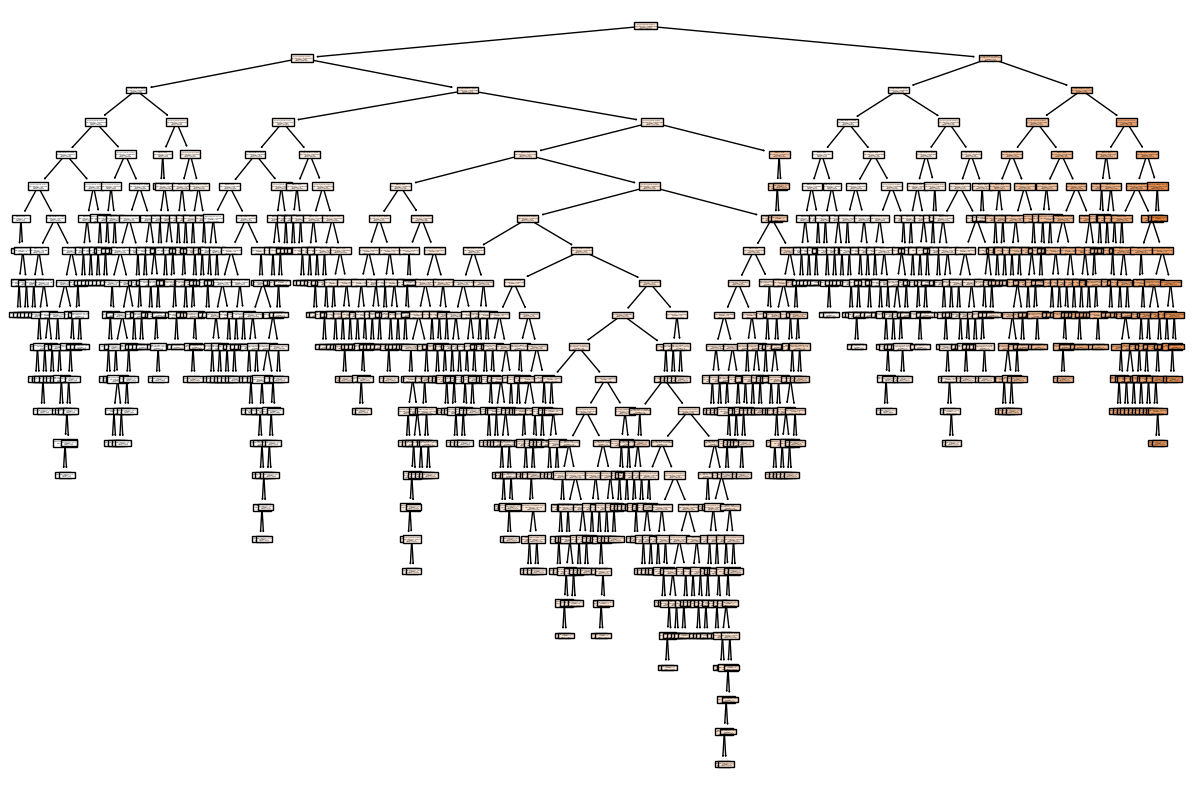

In [168]:
# Plot the full tree.
plt.figure(figsize=(15,10))
plot_tree(regressor,
          feature_names=X.columns.tolist(),
          filled=True)
plt.show()


In [169]:
# Print additional information about the full tree.
print("Depth =", regressor.get_depth())
print("Leaves =", regressor.get_n_leaves())


Depth = 23
Leaves = 556


#### Using GridSearch CV to find the optimal parameters for the decision tree.

In [170]:
# Define parameter grid.
param_grid = {"max_depth": range(1, 23),
              "max_leaf_nodes": range(1, 556)}

# Initialize DecisionTreeRegressor.
best_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV.
grid_search = GridSearchCV(estimator=best_regressor, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring="neg_mean_squared_error")

# Fit GridSearchCV.
grid_search.fit(X_train, y_train)

# Get best parameters and test score.
best_params = grid_search.best_params_
test_score = grid_search.score(X_test, y_test)

# View the parameters.
print(best_params)
print(test_score)


{'max_depth': 19, 'max_leaf_nodes': 450}
-8025.674248502965


> GridSearchCV suggest optimal parameters for the tree to be max_depth 19 and max_leaf_nodes 450.

In [172]:
# Create the model specifying max depth = 19 and max leaf nodes = 450.
regressor_2 = DecisionTreeRegressor(max_depth=19, 
                                    max_leaf_nodes=450, 
                                    random_state=42)

# Fit the data to the model.
regressor_2.fit(X_train, y_train)

# Predict y for X_test.
y_predict_2 = regressor_2.predict(X_test)


In [174]:
# Evaluate the model.
# Predict on training data.
y_train_pred_final = regressor_2.predict(X_train)

# Predict on testing data.
y_test_pred_final = regressor_2.predict(X_test)

# Calculate R-squared for training data.
r_squared_train_final = r2_score(y_train, y_train_pred_final)

# Calculate R-squared for testing data.
r_squared_test_final = r2_score(y_test, y_test_pred_final)

# Print R-squared values.
print("R-squared for training data:", r_squared_train_final)
print("R-squared for testing data:", r_squared_test_final)


R-squared for training data: 0.9999969181486726
R-squared for testing data: 0.9950452590605697


In [175]:
# Print the MAE and MSE to evaluate the new model.
print("Mean Absolute Error = {:2.2f}".format(metrics.mean_absolute_error(y_test, y_predict_2)))
print("Mean Squared Error = {:2.2f}".format(metrics.mean_squared_error(y_test, y_predict_2)))

# Calculate the RMSE.
print("Root Mean Squared Error = {:2.2f}".format(math.sqrt(metrics.mean_squared_error(y_test, y_predict_2))))


Mean Absolute Error = 31.81
Mean Squared Error = 8025.67
Root Mean Squared Error = 89.59


## 4. Fit and plot final model.

In [176]:
# The final model based on a max depth = 19 and max leaf nodes = 450.
final_regressor = DecisionTreeRegressor(max_depth=19,
                                        max_leaf_nodes=450,
                                        random_state=42)


# Fit the data to the model.
final_regressor.fit(X, y)


DecisionTreeRegressor(max_depth=19, max_leaf_nodes=450, random_state=42)

In [177]:
# Predict the target variable for the entire dataset.
final_y_pred = final_regressor.predict(X)

# Calculate R-squared.
r_squared = r2_score(y, final_y_pred)

# Print R-squared.
print("R-squared:", r_squared)


R-squared: 0.9999728423957439


In [178]:
# Print the MAE and MSE to evaluate the final model.
print("Mean Absolute Error = {:2.2f}".format(metrics.mean_absolute_error(y, final_y_pred)))
print("Mean Squared Error = {:2.2f}".format(metrics.mean_squared_error(y, final_y_pred)))

# Calculate the RMSE.
print("Root Mean Squared Error = {:2.2f}".format(math.sqrt(metrics.mean_squared_error(y, final_y_pred))))


Mean Absolute Error = 3.32
Mean Squared Error = 44.70
Root Mean Squared Error = 6.69


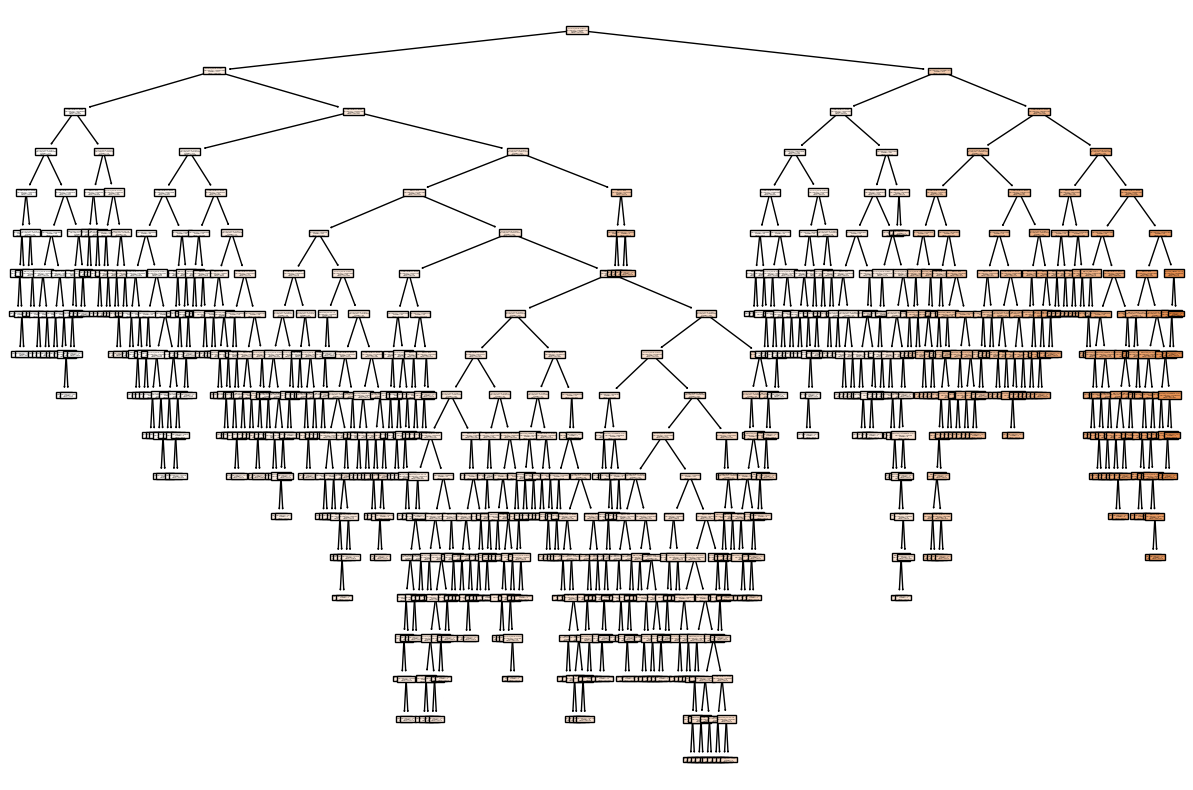

In [179]:
# Plot the pruned tree.
plt.figure(figsize=(15, 10))
plot_tree(final_regressor, 
          feature_names=X.columns.tolist(), 
          filled=True)
plt.show()


In [180]:
# Print the tree depth and number of leaves.
print("Tree depth =", final_regressor.get_depth(),'\n'
      "Number of leaves =", final_regressor.get_n_leaves())


Tree depth = 18 
Number of leaves = 450


In [181]:
# Create a DataFrame with the actual and predicted values.
predictions = pd.DataFrame({"loyalty_points": y, "loyalty_points_predicted": final_y_pred})

# Round the loyalty_points_predicted column.
predictions["loyalty_points_predicted"] = predictions["loyalty_points_predicted"].round()
predictions["loyalty_points_predicted"] = predictions["loyalty_points_predicted"].astype(int)

# View the DataFrame.
predictions


loyalty_points  loyalty_points_predicted
0                210                       210
1                524                       522
2                 40                        42
3                562                       570
4                366                       366
...              ...                       ...
1995            4031                      4031
1996             539                       524
1997            5614                      5614
1998            1048                      1043
1999             479                       473

[2000 rows x 2 columns]

In [182]:
# Create a new column to hold the difference in actual and predicted value for loyalty points.
predictions["difference"] = predictions["loyalty_points"] - predictions["loyalty_points_predicted"]

# View the DataFrame.
predictions


loyalty_points  loyalty_points_predicted  difference
0                210                       210           0
1                524                       522           2
2                 40                        42          -2
3                562                       570          -8
4                366                       366           0
...              ...                       ...         ...
1995            4031                      4031           0
1996             539                       524          15
1997            5614                      5614           0
1998            1048                      1043           5
1999             479                       473           6

[2000 rows x 3 columns]

In [183]:
# Sort the difference column.
predictions.sort_values(by="difference")


loyalty_points  loyalty_points_predicted  difference
1494            1310                      1373         -63
1935            1403                      1436         -33
1848             334                       365         -31
1573            1180                      1211         -31
1629            1158                      1186         -28
...              ...                       ...         ...
1858             450                       419          31
1476            1739                      1707          32
1875             604                       570          34
1646             406                       365          41
1583            1488                      1436          52

[2000 rows x 3 columns]

In [184]:
# Calculate the number of correct predictions.
pred_correct = sum(y == final_y_pred)

# Print the number of correct predictions.
print("Number of correct predictions:", pred_correct)


Number of correct predictions: 909


In [185]:
# View descriptive statistics.
predictions.describe()


loyalty_points  loyalty_points_predicted   difference
count     2000.000000               2000.000000  2000.000000
mean      1578.032000               1578.028500     0.003500
std       1283.239705               1283.248398     6.691478
min         25.000000                 31.000000   -63.000000
25%        772.000000                780.000000    -1.000000
50%       1276.000000               1275.000000     0.000000
75%       1751.250000               1752.000000     0.000000
max       6847.000000               6847.000000    52.000000

#### Feature Importance

In [186]:
# Calculate permutation importance.
perm_importance = permutation_importance(final_regressor, 
                                         X, 
                                         y, 
                                         n_repeats=10, 
                                         random_state=42)

# Get feature importances.
feature_importances = perm_importance.importances_mean

# Print feature importances.
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance} {final_regressor.feature_names_in_[i]}")
    

Feature 0: 0.052155191547048285 age
Feature 1: 0.8634277203193857 remuneration
Feature 2: 1.2454805457366827 spending_score
Feature 3: 0.0007325293356560403 gender_Female
Feature 4: 0.0038746095951696425 gender_Male
Feature 5: 1.874287111602868e-05 education_Basic
Feature 6: 0.00042028497197031943 education_PhD
Feature 7: 0.0008620680204962317 education_diploma
Feature 8: 0.00073595709673131 education_graduate
Feature 9: 0.0005168800346736057 education_postgraduate


## 5. Discuss: Insights and observations



* **spending_score**, **remuneration**, and **age** are the features with the highest importance in this model. The higher importance scores for these features suggest that they have a stronger influence on the model's predictions compared to gender and education.
    * Gender and education have significantly lower importance scores, and could perhaps be excluded from the model.
* Similarly to the linear regression results, **spending_score** is most predictive of the target variable ***loyalty_points***.
* Comparing RMSE and MAE, the difference between them is RMSE-MAE = 6.69-3.32 = 3.37. Numbers close to 0 indicate that there are no large errors in the forecast. Therefore, a value of 3.37 is an acceptable outcome and the model can fairly closely predict actual values.


# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [187]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")


In [188]:
# Load the CSV file(s) as reviews2.
reviews2 = pd.read_csv("reviews_clean.csv")

# View DataFrame.
reviews2.head()


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [189]:
# Drop unnecessary columns.
reviews2 = reviews2.drop(columns=["gender", "age", "loyalty_points", "education",
                                  "product", "review", "summary"])

# View DataFrame.
reviews2.head()


remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [190]:
# Explore the data.
print(reviews2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


In [191]:
print(reviews2.shape)
print(reviews2.dtypes)


(2000, 2)
remuneration      float64
spending_score      int64
dtype: object


In [192]:
# Descriptive statistics.
reviews2.describe()


remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

Text(0, 0.5, 'Spending score')

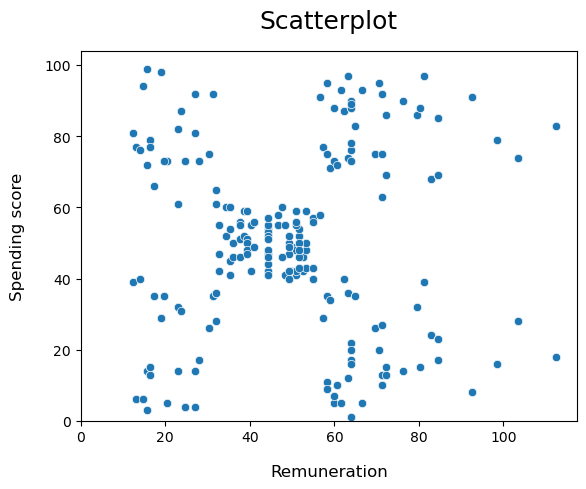

In [193]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x="remuneration",
                y="spending_score",
                data=reviews2)

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot", fontsize=18, y=1.04)
plt.xlabel("Remuneration", fontsize=12, labelpad=14)
plt.ylabel("Spending score", fontsize=12, labelpad=14)


Text(0.5, 1.06, 'Pairplot')

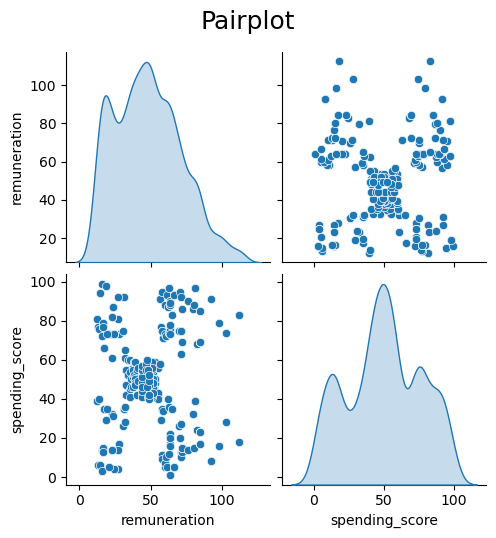

In [194]:
# Create a pairplot with Seaborn.
x = reviews2[["remuneration", "spending_score"]]

sns.pairplot(reviews2,
             vars=x,
             diag_kind="kde")

# Set plot title.
plt.suptitle("Pairplot", fontsize=18, y=1.06)


## 3. Elbow and silhoutte methods

#### Determine the number of clusters: Elbow method

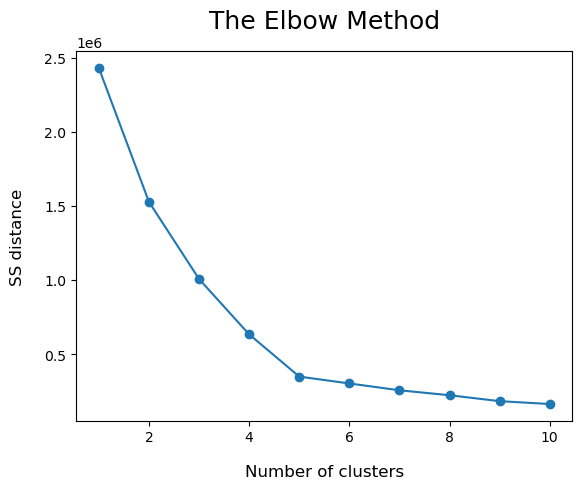

In [195]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init="k-means++",
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker="o")

# Insert labels and title.
plt.title("The Elbow Method", fontsize=18, y=1.04)
plt.xlabel("Number of clusters", fontsize=12, labelpad=14)
plt.ylabel("SS distance", fontsize=12, labelpad=14)

# Show the plot.
plt.show()


#### Determine the number of clusters: Silhouette method


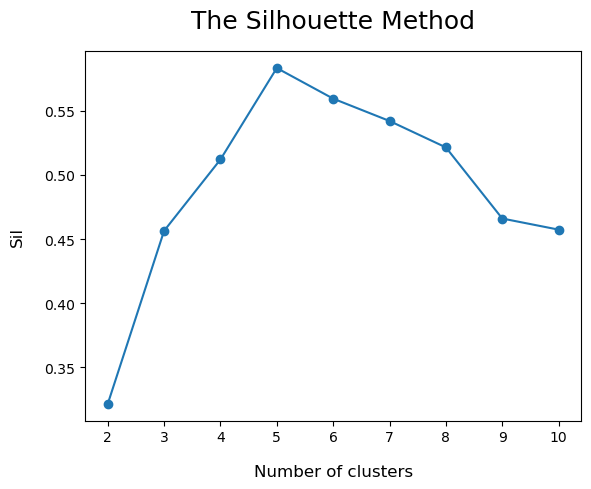

In [196]:
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric="euclidean"))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker="o")

# Insert labels and title.
plt.title("The Silhouette Method", fontsize=18, y=1.04)
plt.xlabel("Number of clusters", fontsize=12, labelpad=14)
plt.ylabel("Sil", fontsize=12, labelpad=14)

# Show the plot.
plt.show()


> Based on the silhouette and elbow method the best value for k=5. I will examine k=4, k=5, and k=6 to determine the optimal number of clusters.

## 4. Evaluate k-means model at different values of *k*

#### 4 clusters

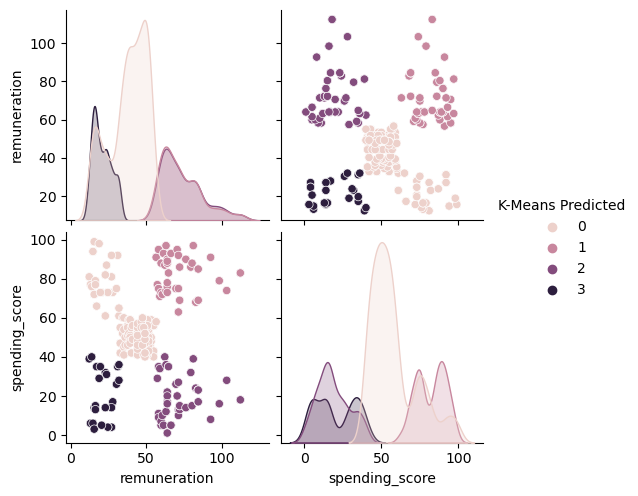

In [197]:
# Use 4 clusters.
kmeans = KMeans(n_clusters=4, 
                max_iter=15000,
                init="k-means++",
                random_state=0).fit(x)

clusters = kmeans.labels_

x["K-Means Predicted"] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue="K-Means Predicted",
             diag_kind="kde")


In [198]:
# Check the number of observations per predicted class.
x["K-Means Predicted"].value_counts()


K-Means Predicted
0    1013
1     356
2     351
3     280
Name: count, dtype: int64

In [199]:
# View the K-Means predicted.
x.head()


remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  0
2         13.12               6                  3
3         13.12              77                  0
4         13.94              40                  3

Text(0, 0.5, 'Spending score')

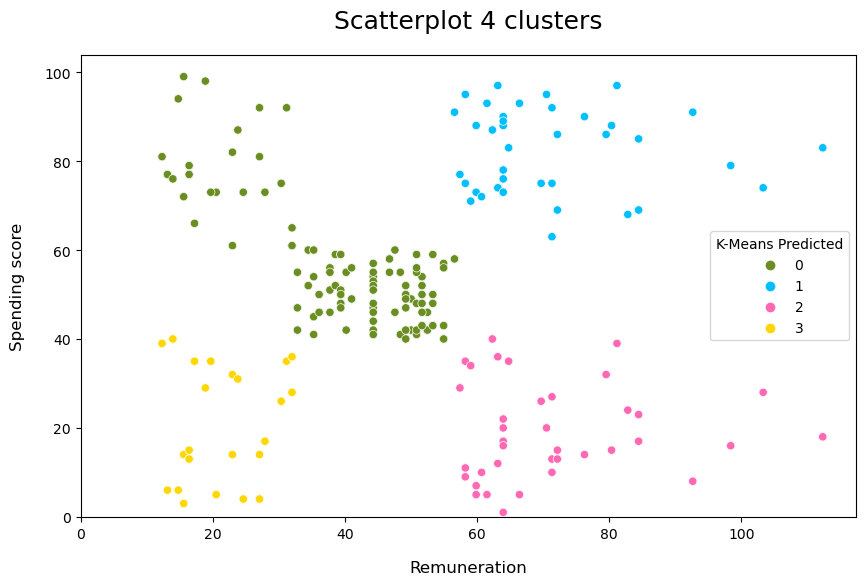

In [200]:
# Visualising the 4 clusters.
plt.figure(figsize=(10,6))

# Create a scatterplot.
sns.scatterplot(x="remuneration", 
                y="spending_score",
                data=x,
                hue="K-Means Predicted",
                palette=["olivedrab", "deepskyblue", "hotpink", "gold"])

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot 4 clusters", fontsize=18, y=1.04)
plt.xlabel("Remuneration", fontsize=12, labelpad=14)
plt.ylabel("Spending score", fontsize=12, labelpad=14)


#### 6 clusters

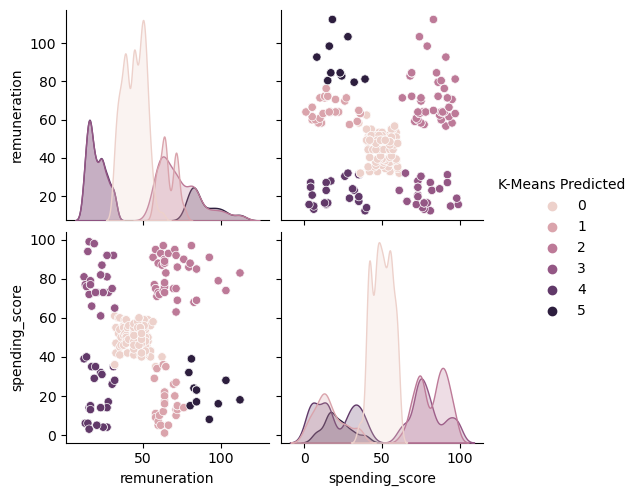

In [201]:
# Use 6 clusters.
kmeans = KMeans(n_clusters=6, 
                max_iter=15000,
                init="k-means++",
                random_state=0).fit(x)

clusters = kmeans.labels_

x["K-Means Predicted"] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue="K-Means Predicted",
             diag_kind="kde")


In [202]:
# Check the number of observations per predicted class.
x["K-Means Predicted"].value_counts()


K-Means Predicted
0    767
2    356
4    271
3    269
1    214
5    123
Name: count, dtype: int64

In [203]:
# View the K-Means predicted.
x.head()


remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4

Text(0, 0.5, 'Spending score')

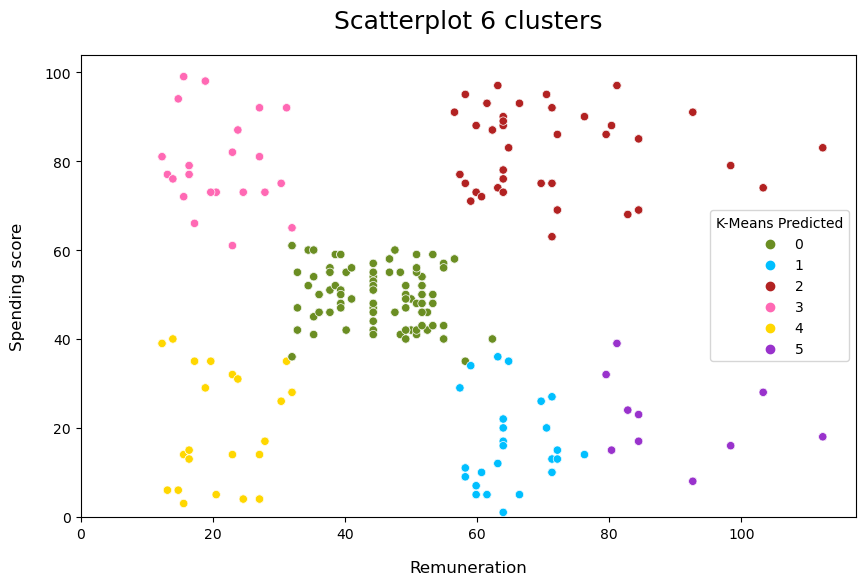

In [204]:
# Visualise the 6 clusters.
plt.figure(figsize=(10,6))

# Create a scatterplot.
sns.scatterplot(x="remuneration", 
                y="spending_score",
                data=x,
                hue="K-Means Predicted",
                palette=["olivedrab", "deepskyblue", "firebrick", "hotpink", "gold", "darkorchid"])

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot 6 clusters", fontsize=18, y=1.04)
plt.xlabel("Remuneration", fontsize=12, labelpad=14)
plt.ylabel("Spending score", fontsize=12, labelpad=14)


## 5. Fit final model and justify your choice

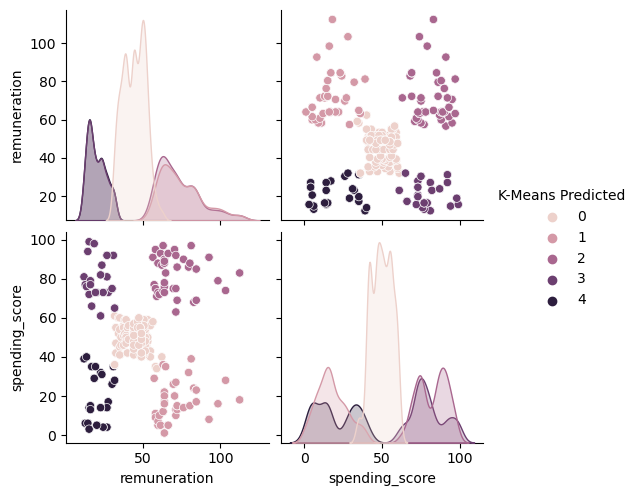

In [205]:
# Apply the final model using 5 clusters.
kmeans = KMeans(n_clusters=5, 
                max_iter=15000,
                init="k-means++",
                random_state=0).fit(x)

clusters = kmeans.labels_

x["K-Means Predicted"] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue="K-Means Predicted",
             diag_kind="kde")


In [206]:
# Check the number of observations per predicted class.
x["K-Means Predicted"].value_counts()


K-Means Predicted
0    774
2    356
1    330
4    271
3    269
Name: count, dtype: int64

In [207]:
# View the K-Means predicted.
x.head()


remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4

## 6. Plot and interpret the clusters

Text(0, 0.5, 'Spending score')

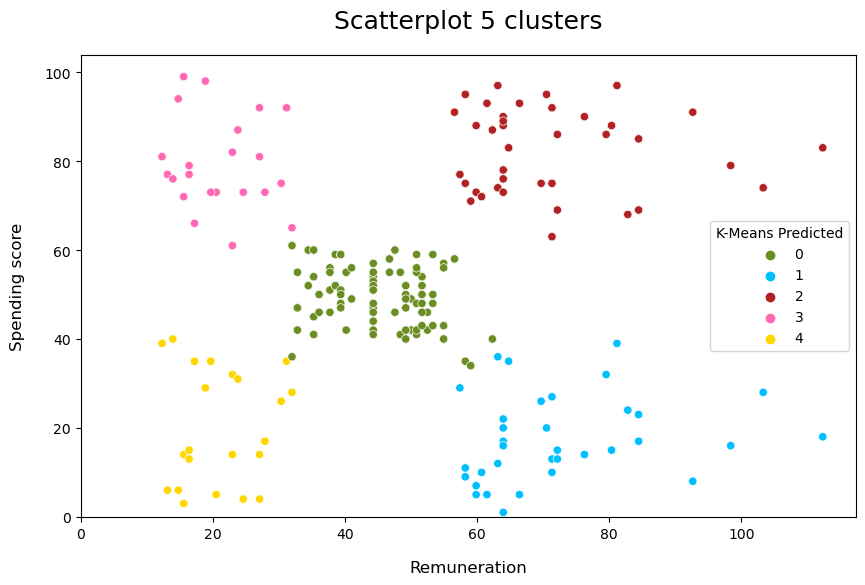

In [208]:
# Visualise the 5 clusters.
plt.figure(figsize=(10,6))

# Create a scatterplot.
sns.scatterplot(x="remuneration", 
                y="spending_score",
                data=x,
                hue="K-Means Predicted",
                palette=["olivedrab", "deepskyblue", "firebrick", "hotpink", "gold"])

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Set plot title and labels.
plt.title("Scatterplot 5 clusters", fontsize=18, y=1.04)
plt.xlabel("Remuneration", fontsize=12, labelpad=14)
plt.ylabel("Spending score", fontsize=12, labelpad=14)


In [209]:
x.describe()


remuneration  spending_score  K-Means Predicted
count   2000.000000     2000.000000        2000.000000
mean      48.079060       50.000000           1.466500
std       23.123984       26.094702           1.451183
min       12.300000        1.000000           0.000000
25%       30.340000       32.000000           0.000000
50%       47.150000       50.000000           1.000000
75%       63.960000       73.000000           3.000000
max      112.340000       99.000000           4.000000

### Analysing the clusters

In [210]:
# Cluster 0.
cluster_0 = x[x["K-Means Predicted"] == 0]
cluster_0.head()


remuneration  spending_score  K-Means Predicted
42         31.98              36                  0
43         31.98              61                  0
46         32.80              55                  0
47         32.80              47                  0
48         32.80              42                  0

In [211]:
# View descriptive statistics.
cluster_0.describe()


remuneration  spending_score  K-Means Predicted
count    774.000000      774.000000              774.0
mean      44.418786       49.529716                0.0
std        7.088279        6.484414                0.0
min       31.980000       34.000000                0.0
25%       38.540000       44.000000                0.0
50%       44.280000       50.000000                0.0
75%       50.020000       55.000000                0.0
max       62.320000       61.000000                0.0

In [212]:
# Cluster 1.
cluster_1 = x[x["K-Means Predicted"] == 1]
cluster_1.head()


remuneration  spending_score  K-Means Predicted
124         57.40              29                  1
128         58.22              11                  1
130         58.22               9                  1
134         59.86               5                  1
136         59.86               7                  1

In [213]:
# View descriptive statistics.
cluster_1.describe()


remuneration  spending_score  K-Means Predicted
count    330.000000      330.000000              330.0
mean      74.831212       17.424242                1.0
std       13.638540        9.515402                0.0
min       57.400000        1.000000                1.0
25%       63.960000       10.000000                1.0
50%       71.340000       16.000000                1.0
75%       82.820000       23.750000                1.0
max      112.340000       39.000000                1.0

In [214]:
# Cluster 2.
cluster_2 = x[x["K-Means Predicted"] == 2]
cluster_2.head()


remuneration  spending_score  K-Means Predicted
123         56.58              91                  2
125         57.40              77                  2
127         58.22              95                  2
129         58.22              75                  2
131         58.22              75                  2

In [215]:
# View descriptive statistics.
cluster_2.describe()


remuneration  spending_score  K-Means Predicted
count    356.000000      356.000000              356.0
mean      73.240281       82.008427                2.0
std       13.557856        9.342765                0.0
min       56.580000       63.000000                2.0
25%       63.140000       74.000000                2.0
50%       71.340000       83.000000                2.0
75%       81.180000       90.000000                2.0
max      112.340000       97.000000                2.0

In [216]:
# Cluster 3.
cluster_3 = x[x["K-Means Predicted"] == 3]
cluster_3.head()


remuneration  spending_score  K-Means Predicted
1         12.30              81                  3
3         13.12              77                  3
5         13.94              76                  3
7         14.76              94                  3
9         15.58              72                  3

In [217]:
# View descriptive statistics.
cluster_3.describe()


remuneration  spending_score  K-Means Predicted
count    269.000000      269.000000              269.0
mean      20.353680       79.416357                3.0
std        5.737253       10.395781                0.0
min       12.300000       61.000000                3.0
25%       15.580000       73.000000                3.0
50%       19.680000       77.000000                3.0
75%       24.600000       87.000000                3.0
max       31.980000       99.000000                3.0

In [218]:
# Cluster 4.
cluster_4 = x[x["K-Means Predicted"] == 4]
cluster_4.head()


remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
2         13.12               6                  4
4         13.94              40                  4
6         14.76               6                  4
8         15.58               3                  4

In [219]:
# View descriptive statistics.
cluster_4.describe()


remuneration  spending_score  K-Means Predicted
count    271.000000      271.000000              271.0
mean      20.424354       19.763838                4.0
std        5.719723       12.666796                0.0
min       12.300000        3.000000                4.0
25%       15.580000        6.000000                4.0
50%       19.680000       15.000000                4.0
75%       24.600000       32.000000                4.0
max       31.980000       40.000000                4.0

## 7. Discuss: Insights and observations


### Observations

* Based on the initial data exploration and visualisation 5 clusters could be identified. 
* Applying the Elbow and Silhouette methods further supported the identification of 5 clusters.
    * Elbow Method: Determines the optimal number of clusters based on the trade-off between model complexity and clustering performance. An "elbow" can be detected at 5 clusters.
    * Silhouette Method: Evaluates the cohesion and separation of clusters. A higher silhouetter score indicates that data points are well matched to their own cluster and poorly matched to neighbouring clusters. The highest silhouette score could be reached using 5 clusters.
* To ensure 5 is the optimal number of clusters, the option to use 4 or 6 clusters was also considered. However, 4 clusters does not capture all the distinct groups visible in the data, and 6 clusters leads to additional clustering of outliers.
* From the 5 cluster scatterplot we can identify 2 groups of low income earners (3=pink and 4=yellow), however they are on opposite sides of the spending score spectrum. Similarly, we can identify 2 goups of high income earners (2=red, 1=blue) who also sit on opposite sides of the spending score spectrum. The final group is the middle income earners (0=green) in the middle of the spending score spectrum.


### Customer segments based on clustering

#### Cluster 0: Regular shoppers
Middle income earners with moderate spending score.
* Annual income: £31,980-£62,320
* Spending score: 34-61

*Potential customer profile*

These customers are middle income earners with moderate spending scores, who typically display balanced spending habits. They tend to respond well to marketing messages emphasising quality and affordability and often shop from the mid-range product selection. Highlighting value for money could be key to securing their business.

#### Cluster 1: Conservative Earners
High income earners with low spending score.
* Annual income: £57,400-£112,340
* Spending score: 1-39

*Potential customer profile*

These customers are high income earners with low spending scores, who typically display cautious spending behaviour. They might prioritise savings or investments over spontaneous purchases, therefore personalised offers that showcase long-term benefits could pique their interest.

#### Cluster 2: Luxury Enthusiasts
High income earners with high spending score.
* Annual income: £56,580-£112,340
* Spending score: 63-97

*Potential customer profile*

These customers are high income earners with high spending scores, and they are willing to spend money on luxury or high-end purchases. To appeal to these customers it is important to emphasize luxury, exclusiveness, and brand prestige.

#### Cluster 3: Optimistic Spenders
Low income earners with high spending score.
* Annual income: £12,300-£31,980
* Spending score: 61-99

*Potential customer profile*

These customers are low income earners with high spending scores, who despite limited financial resources display and enthusiastic spending behaviour. These customers are interested in the best budget-friendly deals and flexible payment options to accommodate their spending habits.

#### Cluster 4: Sensible Savers
Low income earners with low income score.
* Annual income: £12,300-£31,980
* Spending score: 3-40

*Potential customer profile*

These customers are low income earners with low spending scores, and they are typically conservative in their spending behaviour. To reach these customers it is important to promote special offers and deals and deliver a strong value proposition. 


# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [220]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download("punkt")
nltk.download("stopwords")

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amandasnellman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amandasnellman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
# Load the data set as df3.
reviews3 = pd.read_csv("reviews_clean.csv")

# View DataFrame.
reviews3.head()


gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [229]:
# Explore data set.
print(reviews3.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [230]:
print(reviews3.shape)
print(reviews3.dtypes)


(2000, 9)
gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


In [231]:
# Descriptive statistics.
reviews3.describe()


age  remuneration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000

In [232]:
# Drop unnecessary columns.
reviews3 = reviews3.drop(columns=["gender", "age", "remuneration", "spending_score",
                                  "loyalty_points", "education", "product"])

# View DataFrame.
reviews3.head()


review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [233]:
# Determine if there are any missing values.
reviews3.isna().sum()


review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [234]:
# Review: Change all to lower case and join with a space.
reviews3["review"] = reviews3["review"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews3["review"].head()


0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [235]:
# Summary: Change all to lower case and join with a space.
reviews3["summary"] = reviews3["summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews3["summary"].head()


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [236]:
# Replace all the punctuations in review column.
# Remove punctuation.
reviews3["review"] = reviews3["review"].str.replace("[^\w\s]", "", regex=True)

# View output.
reviews3["review"].head()


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [237]:
# Replace all the puncuations in summary column.
reviews3["summary"] = reviews3["summary"].str.replace("[^\w\s]", "", regex=True)

# View output.
reviews3["summary"].head()


0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [238]:
# Check the number of duplicate values in the review column.
reviews3.review.duplicated().sum()


50

In [239]:
# Check the number of duplicate values in the summary column.
reviews3.summary.duplicated().sum()


649

In [240]:
# Drop duplicates in both columns.
reviews3 = reviews3.drop_duplicates(subset=["review", "summary"])

# View DataFrame.
reviews3.shape
reviews3.info()
reviews3.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

## 3. Tokenise and create wordclouds

In [241]:
# Create new DataFrame (copy DataFrame).
reviews3_copy = reviews3.copy()

# View DataFrame.
reviews3_copy.head()


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [242]:
# Apply tokenisation to both columns.
reviews3_copy[["review_tokens",
               "summary_tokens"]] = reviews3_copy[["review",
                                                  "summary"]].apply(lambda x: x.apply(word_tokenize))

# View DataFrame.
reviews3_copy.head()


review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       review_tokens  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      summary_tokens  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [243]:
# Create an empty list of review tokens.
all_review_tokens = []
for index, row in reviews3_copy.iterrows():
    all_review_tokens.extend(row["review_tokens"])
    
# Add each filtered token word to the string.
review_tokens_string = " ".join(all_review_tokens)
    

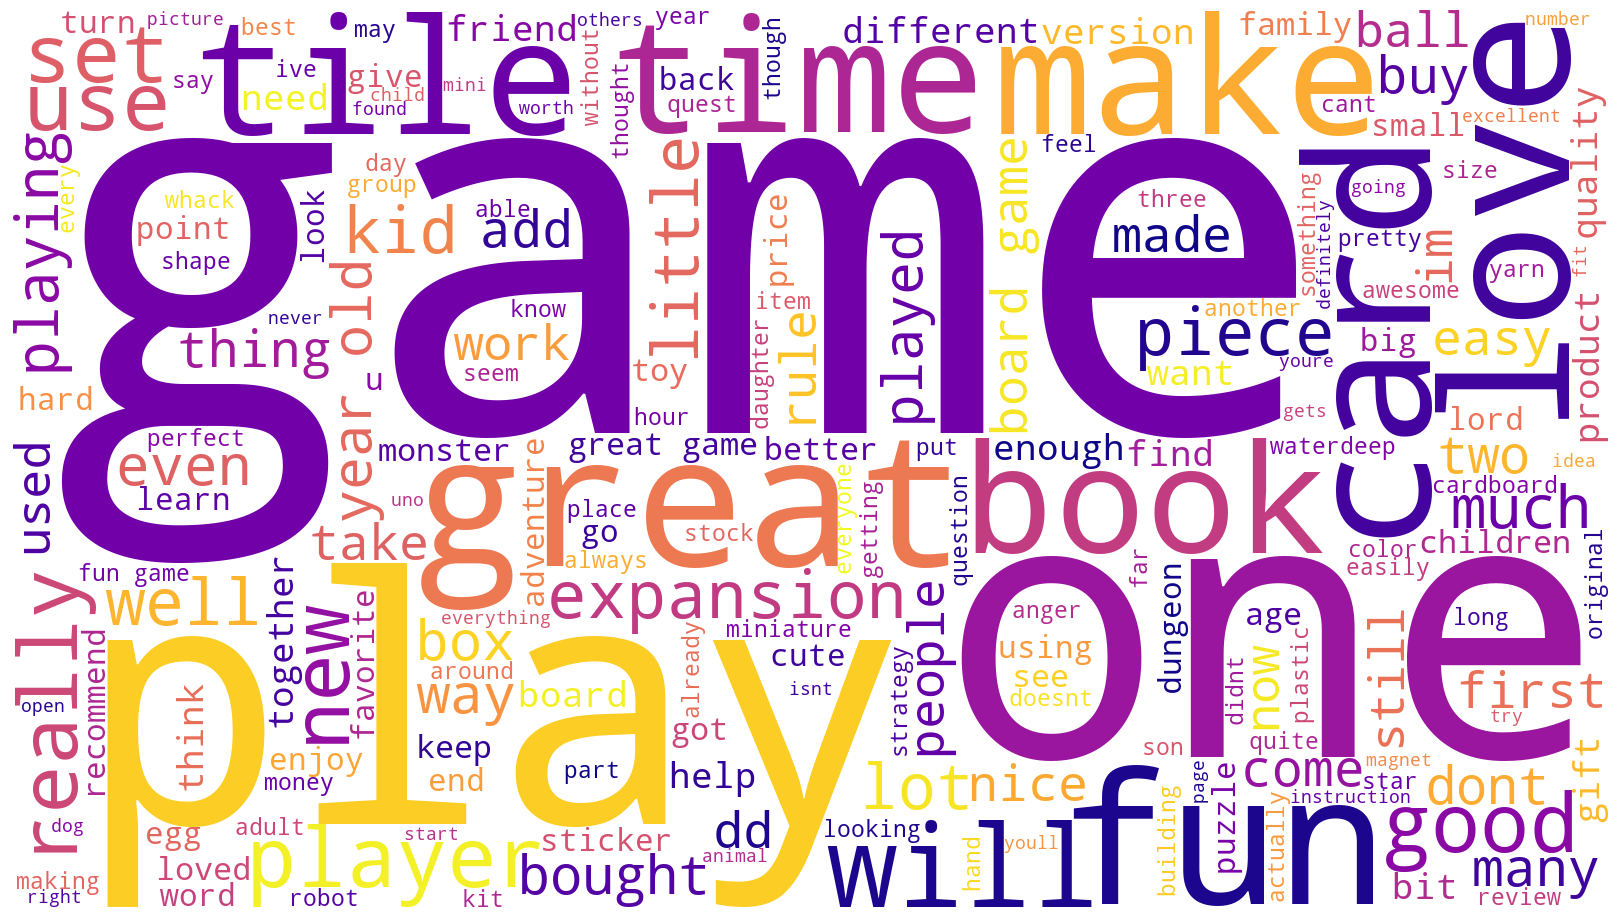

In [244]:
# Review: Create a word cloud.
wordcloud_review = WordCloud(width=1600,
                             height=900,
                             background_color="white",
                             colormap="plasma",
                             min_font_size = 10).generate(review_tokens_string)

# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None) 
plt.imshow(wordcloud_review) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()


In [245]:
# Create an empty list of summary tokens.
all_summary_tokens = []
for index, row in reviews3_copy.iterrows():
    all_summary_tokens.extend(row["summary_tokens"])
    
# Add each filtered token word to the string.
summary_tokens_string = " ".join(all_summary_tokens)
    

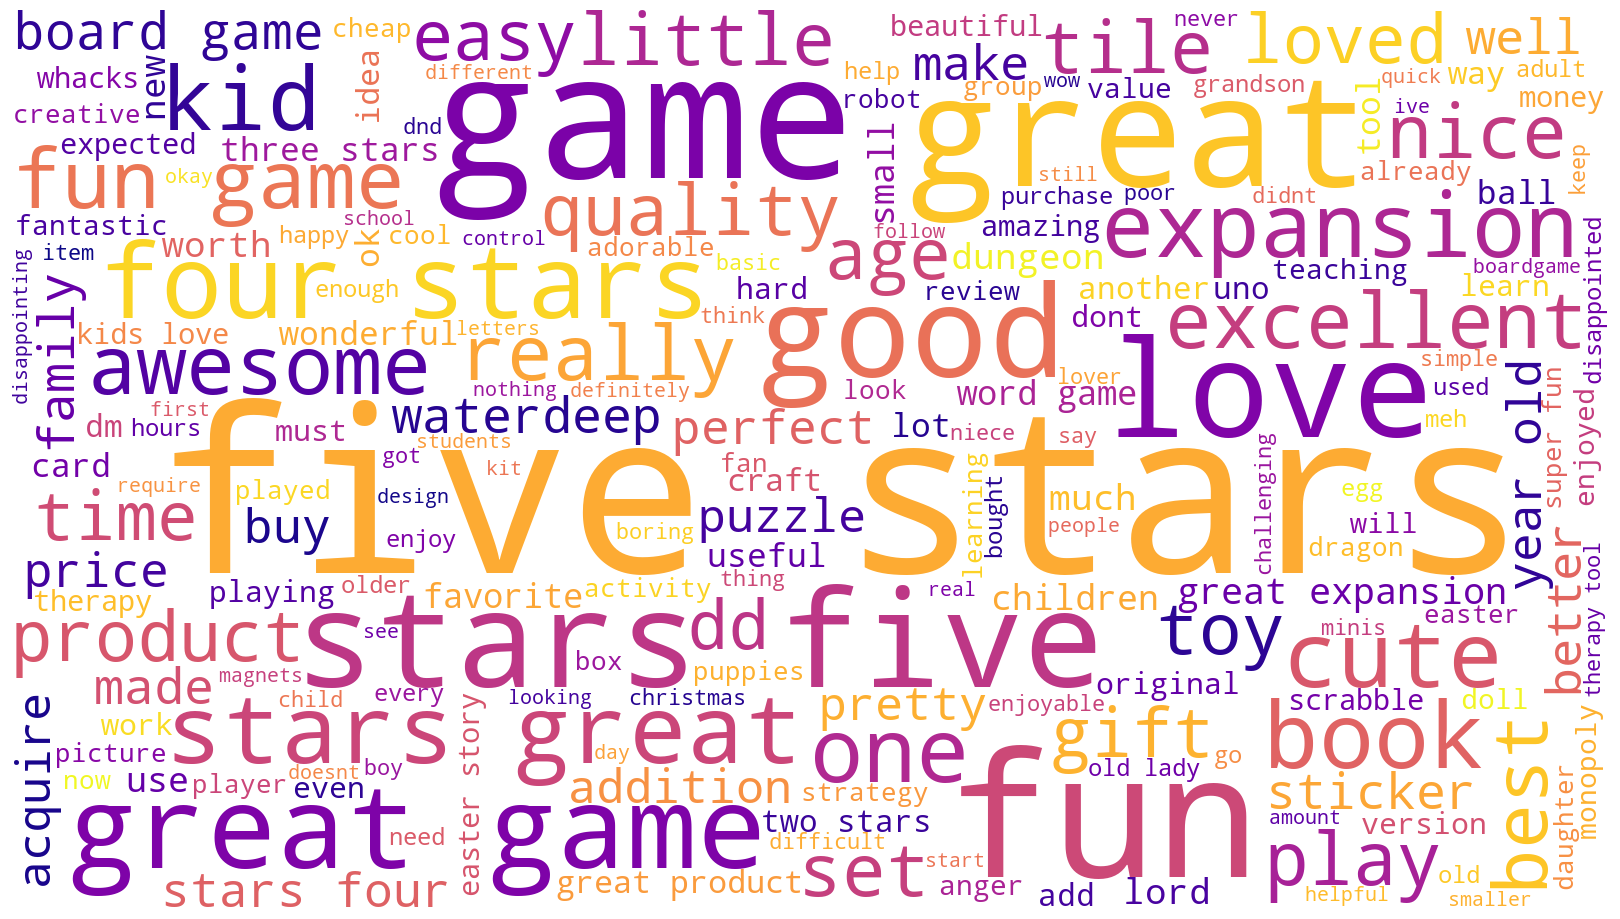

In [246]:
# Summary: Create a word cloud.
wordcloud_summary = WordCloud(width=1600,
                              height=900,
                              background_color="white",
                              colormap="plasma",
                              min_font_size = 10).generate(summary_tokens_string)

# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None) 
plt.imshow(wordcloud_summary) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()


## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [247]:
# Determine the frequency distribution for the review column.
fdist_review = FreqDist(all_review_tokens)

# Preview data.
fdist_review


FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [248]:
# Determine the frequency distribution for the summary column.
fdist_summary = FreqDist(all_summary_tokens)

# Preview data.
fdist_summary


FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [249]:
# Delete all the alpanum for the review tokens.
all_review_tokens_fin = [word for word in all_review_tokens if word.isalnum()]

# Delete all the alpanum for the summary tokens.
all_summary_tokens_fin = [word for word in all_summary_tokens if word.isalnum()]


In [250]:
# Remove all the stopwords
# Create a set of English stopwords.
english_stopwords = set(stopwords.words("english"))

# Create a filtered list of review tokens without stopwords.
review_tokens_fin = [x for x in all_review_tokens_fin if x.lower() not in english_stopwords]
review_tokens_clean = " ".join(review_tokens_fin)

# Create a filtered list of summary tokens without stopwords.
summary_tokens_fin = [x for x in all_summary_tokens_fin if x.lower() not in english_stopwords]
summary_tokens_clean = " ".join(summary_tokens_fin)


### 4c) Create wordcloud without stopwords

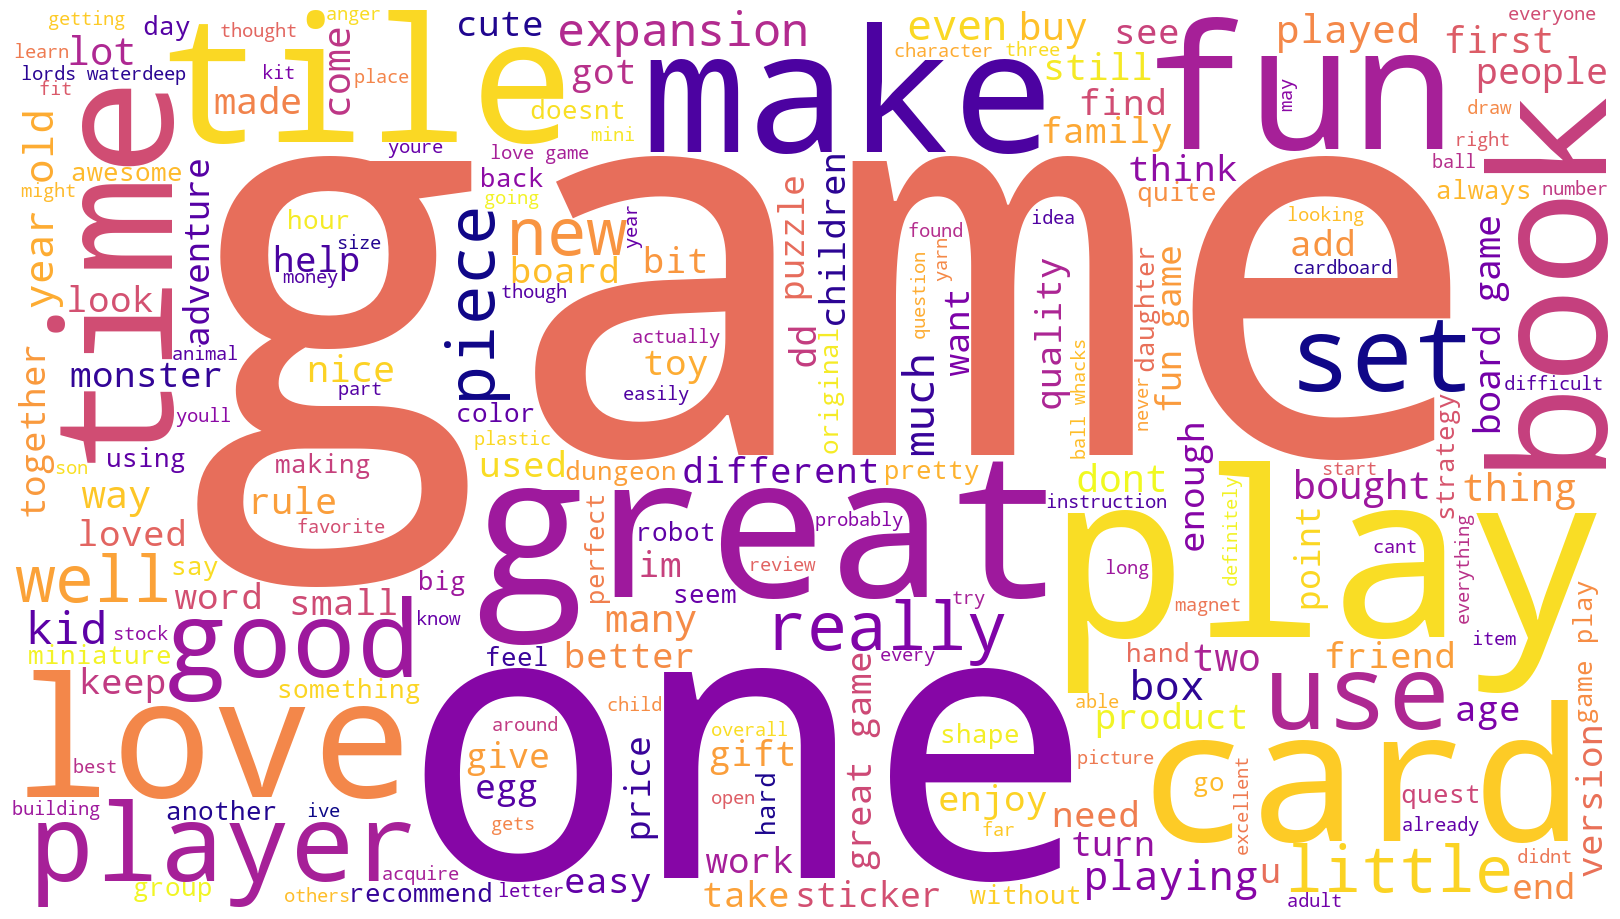

In [251]:
# Review: Create a word cloud without stop words.
wordcloud_review_clean = WordCloud(width=1600,
                              height=900,
                              background_color="white",
                              colormap="plasma",
                              min_font_size = 10).generate(review_tokens_clean)

# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None) 
plt.imshow(wordcloud_review_clean) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()


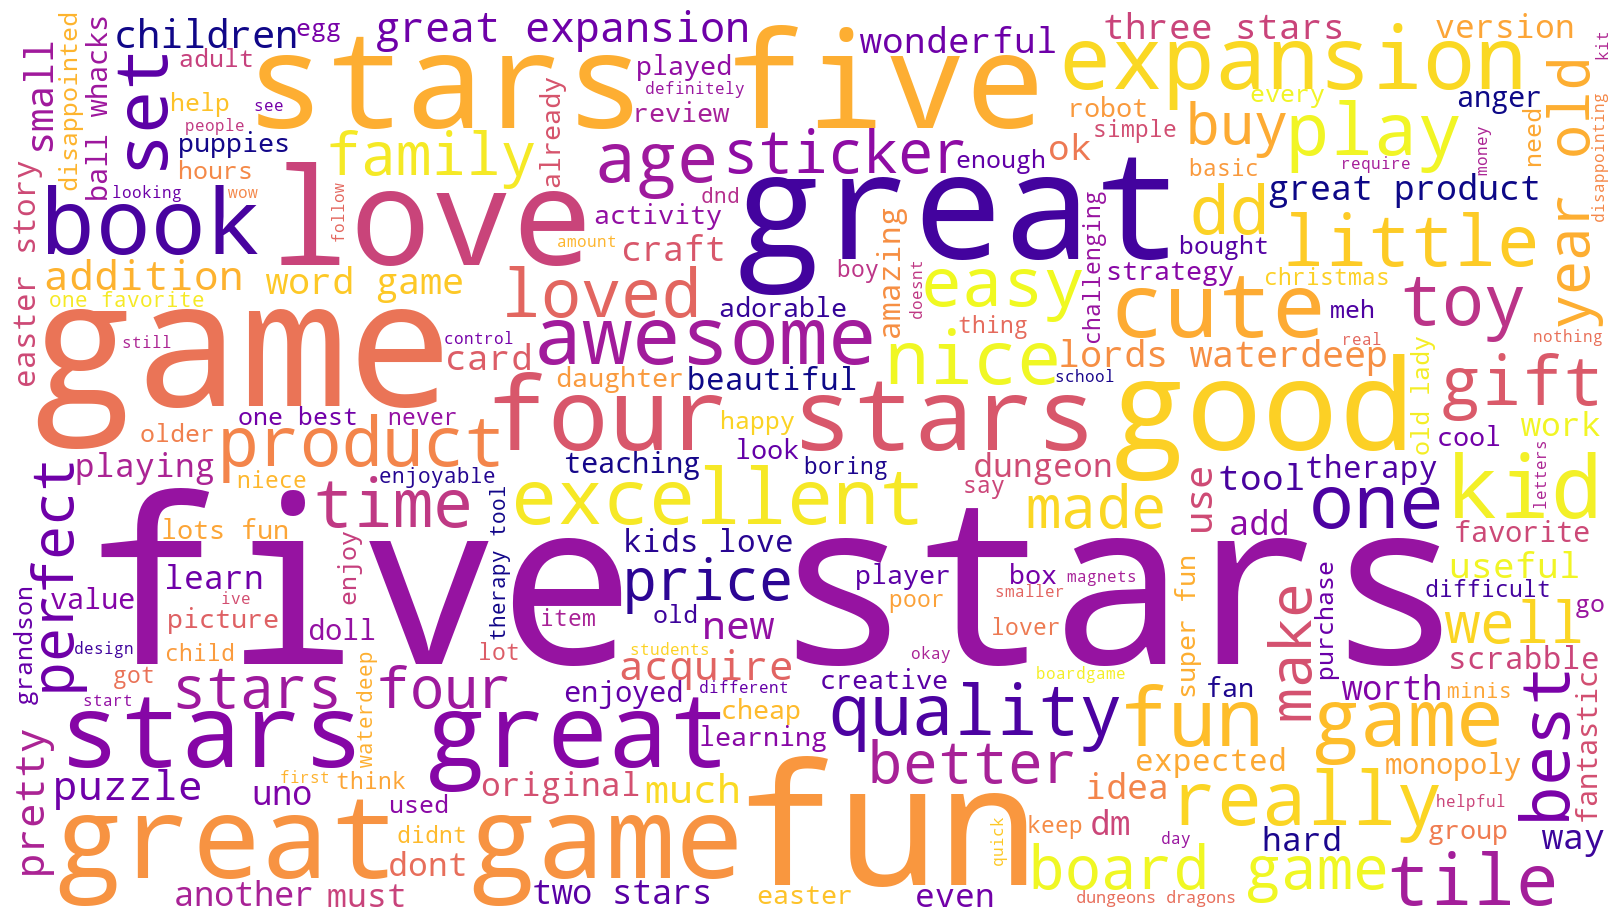

In [252]:
# Summary: Create a word cloud without stop words.
wordcloud_summary_clean = WordCloud(width=1600,
                              height=900,
                              background_color="white",
                              colormap="plasma",
                              min_font_size = 10).generate(summary_tokens_clean)

# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None) 
plt.imshow(wordcloud_summary_clean) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [253]:
# Determine the frequency distribution for the review column.
fdist_review1 = FreqDist(review_tokens_fin)

# Preview data.
fdist_review1


FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [254]:
# Review: Generate a DataFrame from Counter and determine the 15 most common words.
review_counts = pd.DataFrame(Counter(review_tokens_fin).most_common(15),
                             columns=["Word", "Frequency"]).set_index("Word")

# Preview data.
review_counts


Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

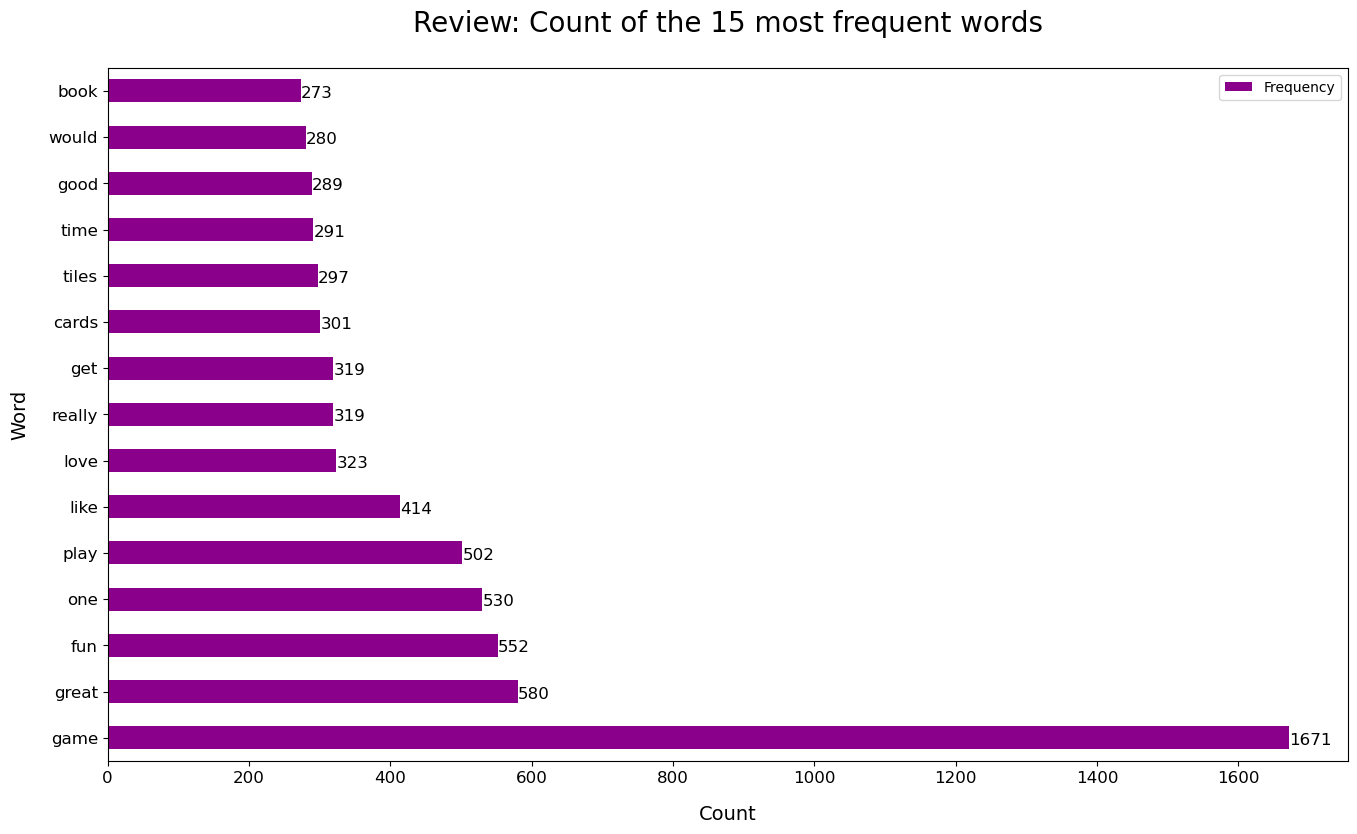

In [255]:
# Set the plot type.
ax = review_counts.plot(kind="barh",
                        figsize=(16, 9),
                        fontsize=12,
                        color="darkmagenta")

# Set the plot title and labels.
ax.set_title("Review: Count of the 15 most frequent words",
             fontsize=20, y=1.04)
ax.set_xlabel("Count", fontsize=14, labelpad=14)
ax.set_ylabel("Word", fontsize=14, labelpad=14)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color="black")
    

In [256]:
# Determine the frequency distribution for the summary column.
fdist_summary1 = FreqDist(summary_tokens_fin)

# Preview data.
fdist_summary1


FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [257]:
# Summary: Generate a DataFrame from Counter and determine the 15 most common words.
summary_counts = pd.DataFrame(Counter(summary_tokens_fin).most_common(15),
                              columns=["Word", "Frequency"]).set_index("Word")

# Preview data.
summary_counts


Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

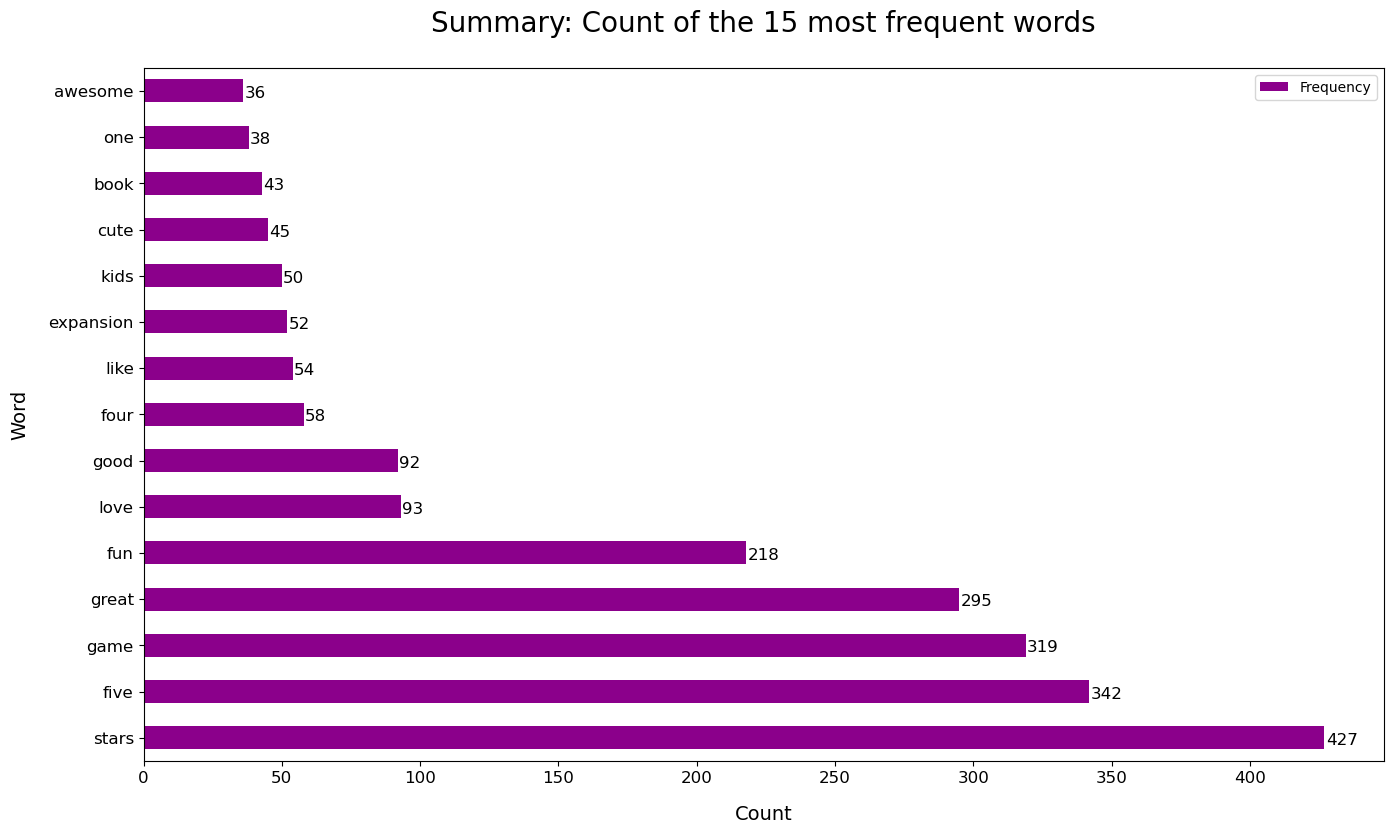

In [258]:
# Set the plot type.
ax = summary_counts.plot(kind="barh",
                         figsize=(16, 9),
                         fontsize=12,
                         color="darkmagenta")

# Set the plot title and labels.
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20, y=1.04)
ax.set_xlabel("Count", fontsize=14, labelpad=14)
ax.set_ylabel("Word", fontsize=14, labelpad=14)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color="black")
    

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [259]:
# Define a function to extract a polarity score for the reviews and summaries.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]


In [260]:
# Populate a new column with polarity scores for each review.
reviews3_copy["review_polarity"] = reviews3_copy["review"].apply(generate_polarity)

# View the result.
reviews3_copy["review_polarity"].head()


0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: review_polarity, dtype: float64

In [261]:
# Populate a new column with polarity scores for each summary.
reviews3_copy["summary_polarity"] = reviews3_copy["summary"].apply(generate_polarity)

# View the result.
reviews3_copy["summary_polarity"].head()


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64

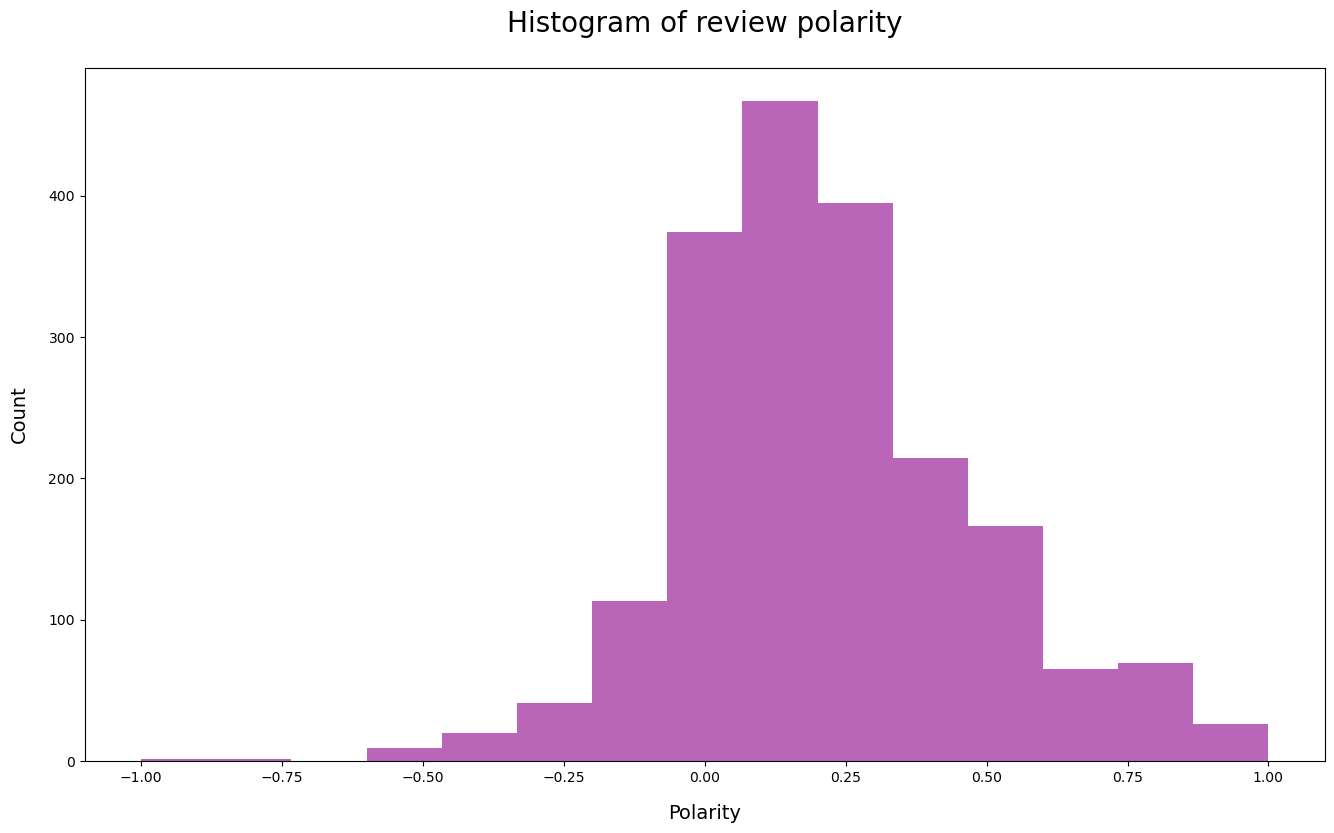

In [262]:
# Review: Create a histogram plot of polarity with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3_copy["review_polarity"], num_bins, facecolor="darkmagenta", alpha=0.6)

# Set the plot title and labels.
plt.title("Histogram of review polarity", fontsize=20, y=1.04)
plt.xlabel("Polarity", fontsize=14, labelpad=14)
plt.ylabel("Count", fontsize=14, labelpad=14)

# Show the plot.
plt.show()


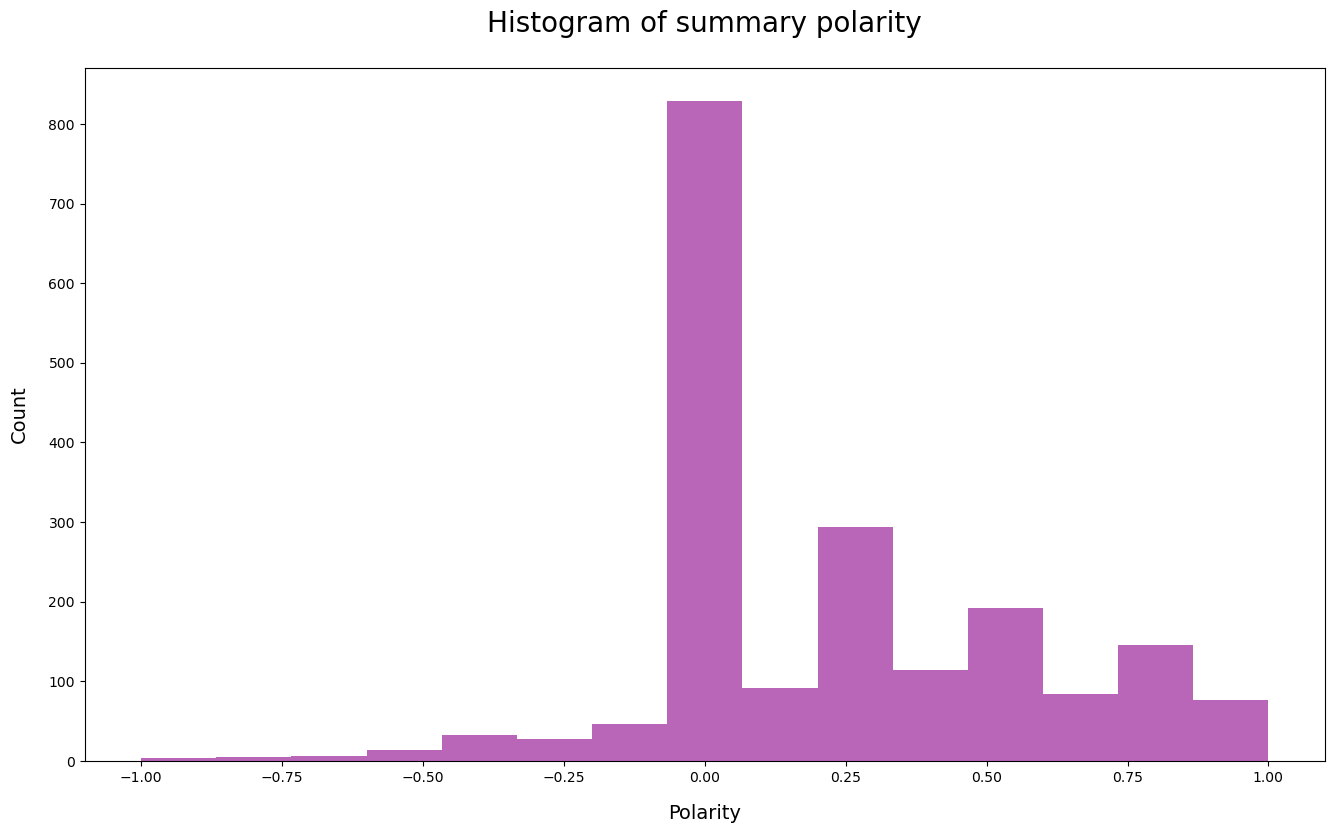

In [263]:
# Summary: Create a histogram plot of polarity with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3_copy["summary_polarity"], num_bins, facecolor="darkmagenta", alpha=0.6)

# Set the plot title and labels.
plt.title("Histogram of summary polarity", fontsize=20, y=1.04)
plt.xlabel("Polarity", fontsize=14, labelpad=14)
plt.ylabel("Count", fontsize=14, labelpad=14)

# Show the plot.
plt.show()


In [264]:
# Define a function to extract a subjectivity score for the reviews and summaries
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]


In [265]:
# Populate a new column with subjectivity scores for each review.
reviews3_copy["review_subjectivity"] = reviews3_copy["review"].apply(generate_subjectivity)

# View the result.
reviews3_copy["review_subjectivity"].head()


0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: review_subjectivity, dtype: float64

In [266]:
# Populate a new column with subjectivity scores for each summary.
reviews3_copy["summary_subjectivity"] = reviews3_copy["summary"].apply(generate_subjectivity)

# View the result.
reviews3_copy["summary_subjectivity"].head()


0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: summary_subjectivity, dtype: float64

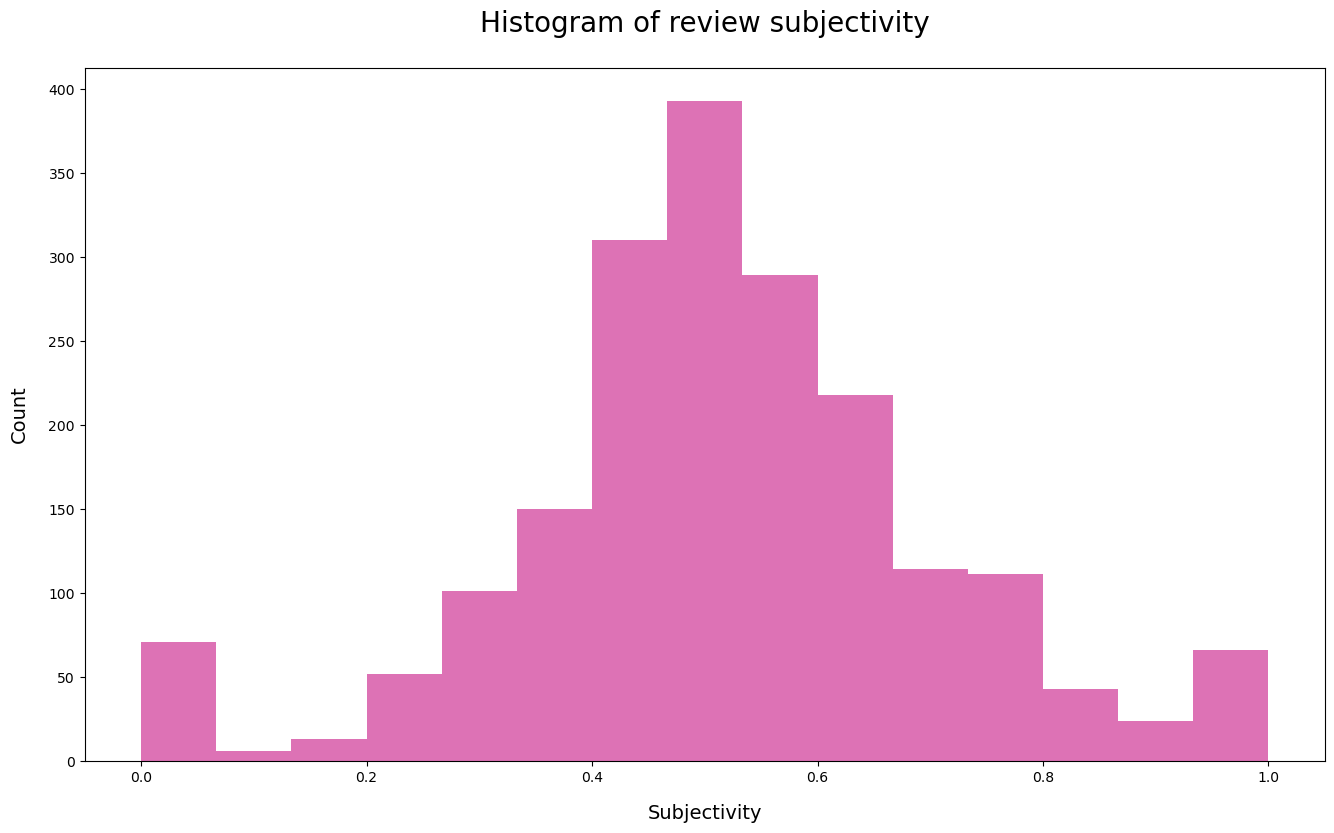

In [267]:
# Review: Create a histogram plot of subjectivity with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3_copy["review_subjectivity"], 
                            num_bins, 
                            facecolor="mediumvioletred", 
                            alpha=0.6)

# Set the plot title and labels.
plt.title("Histogram of review subjectivity", fontsize=20, y=1.04)
plt.xlabel("Subjectivity", fontsize=14, labelpad=14)
plt.ylabel("Count", fontsize=14, labelpad=14)

# Show the plot.
plt.show()


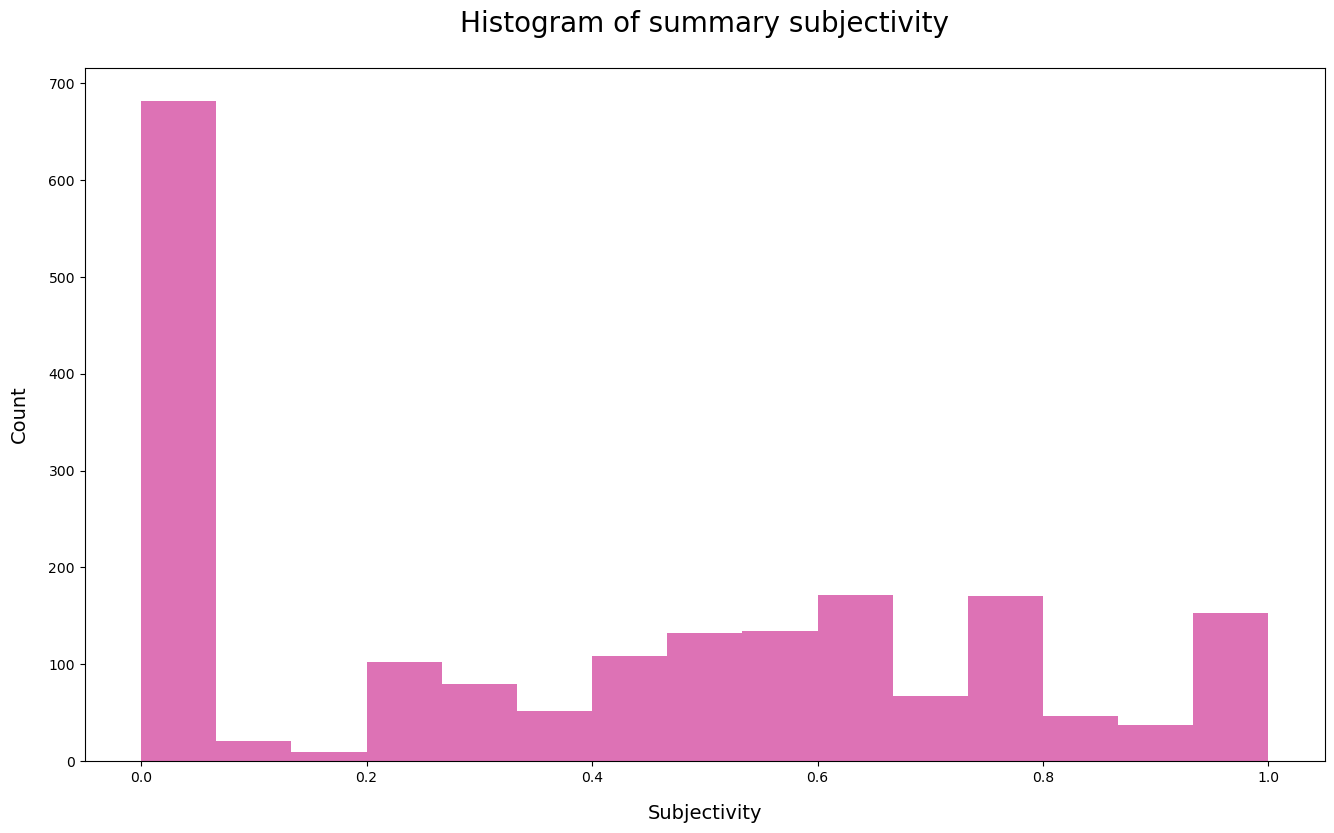

In [268]:
# Summary: Create a histogram plot of subjectivity with bins = 15.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews3_copy["summary_subjectivity"], 
                            num_bins, 
                            facecolor="mediumvioletred", 
                            alpha=0.6)

# Set the plot title and labels.
plt.title("Histogram of summary subjectivity", fontsize=20, y=1.04)
plt.xlabel("Subjectivity", fontsize=14, labelpad=14)
plt.ylabel("Count", fontsize=14, labelpad=14)

# Show the plot.
plt.show()


In [269]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity


# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [270]:
# Top 20 negative reviews.
negative_reviews = reviews3_copy.nsmallest(20, "review_polarity")

# Eliminate unnecessary columns.
negative_reviews = negative_reviews[["review", "review_polarity", "review_subjectivity"]]

# Adjust column width.
negative_reviews.style.set_properties(subset=["review"], **{"width": "1200px"})

# View output.
negative_reviews


review  review_polarity  \
208   booo unles you are patient know how to measure...        -1.000000   
182                   incomplete kit very disappointing        -0.780000   
1804  im sorry i just find this product to be boring...        -0.583333   
364   one of my staff will be using this game soon s...        -0.550000   
117   i bought this as a christmas gift for my grand...        -0.500000   
227   this was a gift for my daughter i found it dif...        -0.500000   
230                    i found the directions difficult        -0.500000   
290              instructions are complicated to follow        -0.500000   
301                                           difficult        -0.500000   
1524                         expensive for what you get        -0.500000   
174   i sent this product to my granddaughter the po...        -0.491667   
347   my 8 yearold granddaughter and i were very fru...        -0.446250   
538   i purchased this on the recommendation of two ...        -0.440741   
306                 very hard complicated to make these        -0.439583   
427                     kids i work with like this game        -0.400000   
437   this game although it appears to be like uno a...        -0.400000   
497   my son loves playing this game it was recommen...        -0.400000   
803                                this game is a blast        -0.400000   
806         i bought this for my son he loves this game        -0.400000   
824             was a gift for my son he loves the game        -0.400000   

      review_subjectivity  
208              1.000000  
182              0.910000  
1804             0.750000  
364              0.300000  
117              0.900000  
227              1.000000  
230              1.000000  
290              1.000000  
301              1.000000  
1524             0.700000  
174              0.433333  
347              0.533750  
538              0.485185  
306              0.852083  
427              0.400000  
437              0.400000  
497              0.400000  
803              0.400000  
806              0.400000  
824              0.400000

In [271]:
# Top 20 negative summaries.
negative_summaries = reviews3_copy.nsmallest(20, "summary_polarity")

# Eliminate unnecessary columns.
negative_summaries = negative_summaries[["summary", "summary_polarity", "summary_subjectivity"]]

# Adjust column width.
negative_summaries.style.set_properties(subset=["summary"], **{"width": "1200px"})

# View output.
negative_summaries


summary  summary_polarity  \
21                        the worst value ive ever seen         -1.000000   
208    boring unless you are a craft person which i am          -1.000000   
829                                              boring         -1.000000   
1166  before this i hated running any rpg campaign d...         -0.900000   
1     another worthless dungeon masters screen from ...         -0.800000   
144                                        disappointed         -0.750000   
631                                        disappointed         -0.750000   
793                                        disappointed         -0.750000   
1620                                       disappointed         -0.750000   
363   promotes anger instead of teaching calming met...         -0.700000   
885            too bad this is not what i was expecting         -0.700000   
890                        bad qualityall made of paper         -0.700000   
178     at age 31 i found these very difficult to make          -0.650000   
101                                    small and boring         -0.625000   
518                                          mad dragon         -0.625000   
805                                       disappointing         -0.600000   
1015                                      disappointing         -0.600000   
1115                                      disappointing         -0.600000   
1804                                      disappointing         -0.600000   
1003  then you will find this board game to be dumb ...         -0.591667   

      summary_subjectivity  
21                1.000000  
208               1.000000  
829               1.000000  
1166              0.700000  
1                 0.900000  
144               0.750000  
631               0.750000  
793               0.750000  
1620              0.750000  
363               0.200000  
885               0.666667  
890               0.666667  
178               1.000000  
101               0.700000  
518               1.000000  
805               0.700000  
1015              0.700000  
1115              0.700000  
1804              0.700000  
1003              0.633333

In [272]:
# Top 20 positive reviews.
positive_reviews = reviews3_copy.nlargest(20, "review_polarity")

# Eliminate unnecessary columns.
positive_reviews = positive_reviews[["review", "review_polarity", "review_subjectivity"]]

# Adjust column width.
positive_reviews.style.set_properties(subset=["review"], **{"width": "1200px"})

# View output.
positive_reviews


review  review_polarity  \
7                             came in perfect condition              1.0   
165                                        awesome book              1.0   
194                                        awesome gift              1.0   
496   excellent activity for teaching selfmanagement...              1.0   
524                         perfect just what i ordered              1.0   
591                                   wonderful product              1.0   
609                                  delightful product              1.0   
621   wonderful for my grandson to learn the resurre...              1.0   
790                                             perfect              1.0   
933                                             awesome              1.0   
1135                                        awesome set              1.0   
1168               best set buy 2 if you have the means              1.0   
1177               awesome addition to my rpg gm system              1.0   
1301                                        its awesome              1.0   
1401  one of the best board games i played in along ...              1.0   
1550  my daughter loves her stickers awesome seller ...              1.0   
1609  this was perfect to go with the 7 bean bags  i...              1.0   
1715                                        awesome toy              1.0   
1720  it is the best thing to play with and also min...              1.0   
1726                  excellent toy to simulate thought              1.0   

      review_subjectivity  
7                     1.0  
165                   1.0  
194                   1.0  
496                   1.0  
524                   1.0  
591                   1.0  
609                   1.0  
621                   1.0  
790                   1.0  
933                   1.0  
1135                  1.0  
1168                  0.3  
1177                  1.0  
1301                  1.0  
1401                  0.3  
1550                  1.0  
1609                  1.0  
1715                  1.0  
1720                  0.3  
1726                  1.0

In [273]:
# Top 20 positive summaries.
positive_summaries = reviews3_copy.nlargest(20, "summary_polarity")

# Eliminate unnecessary columns.
positive_summaries = positive_summaries[["summary", "summary_polarity", "summary_subjectivity"]]

# Adjust column width.
positive_summaries.style.set_properties(subset=["summary"], **{"width": "1200px"})

# View output.
positive_summaries


summary  summary_polarity  \
6                                  best gm screen ever               1.0   
28                                   wonderful designs               1.0   
32                                             perfect               1.0   
80   theyre the perfect size to keep in the car or ...               1.0   
134                            perfect for preschooler               1.0   
140             awesome sticker activity for the price               1.0   
161                                       awesome book               1.0   
163                    he was very happy with his gift               1.0   
187                                            awesome               1.0   
210           awesome and welldesigned for 9 year olds               1.0   
418                                            perfect               1.0   
475                                          excellent               1.0   
543                                          excellent               1.0   
548                             excellent therapy tool               1.0   
580  the pigeon is the perfect addition to a school...               1.0   
599                          best easter teaching tool               1.0   
647                                          wonderful               1.0   
651              all f the mudpuppy toys are wonderful               1.0   
657                                     awesome puzzle               1.0   
662                               not the best quality               1.0   

     summary_subjectivity  
6                     0.3  
28                    1.0  
32                    1.0  
80                    1.0  
134                   1.0  
140                   1.0  
161                   1.0  
163                   1.0  
187                   1.0  
210                   1.0  
418                   1.0  
475                   1.0  
543                   1.0  
548                   1.0  
580                   1.0  
599                   0.3  
647                   1.0  
651                   1.0  
657                   1.0  
662                   0.3

## 7. Discuss: Insights and observations


### Observations

* The most frequent word in reviews is: **game**. 
* The most frequent word in summaries is: **stars**.
* **Great** and **fun** appear frequently across both reviews and summaries, indicating strong positive sentiment. 
* Polarity scores for both reviews and summaries indicate predominantly positive sentiment.
* Reviews have a higher degree of subjectivity compared to summaries.
* Based on the top 20 positive reviews and summaries, majority of sentiment has been categorized accurately given the language, grammar, syntax, and ambiguity. The 20th summary is noticeably less positive than the others, and should perhaps not be considered accurately categotized. 
* Based on the top 20 negative reviews, a noticeable amount of sentiment has not been categorized accurately given the language, grammar, syntax, and ambiguity. We can see quite a few positive reviews on the list.
* Based on the top 20 negative summaries, majority of sentiment has been categorized accurately given the language, grammar, syntax, and ambiguity.
* Overall the sentiment is overwhelmingly positive, however to continue to improve marketing efforts Turtle Games's marketing team would benefit from better understanding where the negative sentiment stems from and how it can be minimised. This could lead to improved customer experience.
* Identifying customers who have had a positive versus a negative experience would enable the marketing team to better target communication. 


# 